# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

# Reading the data

In [3]:
df = pd.read_pickle('EasyMoney_base.pkl', compression='zip')

In [4]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,suma_productos_totales,cliente_activo
0,15891,2018-07-28,2018-07-28,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,59,0,-999.0,Madrid,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,0.0,1,1
1,15891,2018-08-28,2018-07-28,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,59,0,-999.0,Madrid,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.000000,0,0,0.0,1,1
2,16063,2018-11-28,2018-11-19,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290323,1,0,0.0,0,0
3,16063,2018-12-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.258065,0,0,0.0,0,0
4,16063,2019-01-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.258065,0,0,0.0,0,0


# EDA 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 50 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   pk_cid                  int64         
 1   pk_partition            datetime64[ns]
 2   entry_date              datetime64[ns]
 3   entry_channel           category      
 4   active_customer         int64         
 5   segment                 category      
 6   short_term_deposit      int64         
 7   loans                   int64         
 8   mortgage                int64         
 9   funds                   int64         
 10  securities              int64         
 11  long_term_deposit       int64         
 12  em_account_pp           int64         
 13  credit_card             int64         
 14  payroll                 int64         
 15  pension_plan            int64         
 16  payroll_account         int64         
 17  emc_account             int64         
 18  de

In [6]:
df['salary_categ']=df.salary_categ.astype('category')
diferencias=[variable for variable in df.columns if variable.startswith('dif_')]
df[diferencias]=df[diferencias].astype('int64')

In [7]:
categoricas= ['entry_channel','segment','country_id','region_code','salary_categ','gender','region_name']
ids=['pk_cid']
dates=['pk_partition','entry_date']
discretas=[variable for variable in (df.select_dtypes(include='int64').columns) if variable not in ids+dates]
# Here I create a list with all the int64 variables, which are mostly boolean, and exclude the id and dates.

In [8]:
numericas=df.select_dtypes(include='float64').columns

## Categorical variables

In [9]:
def grafico_barras(dataframe, lista):
    for variable in lista:
        val_counts = dataframe[variable].value_counts()
        plt.figure(figsize=(12, 5))
        plt.bar(val_counts.index, val_counts.values)
        plt.title(f'{variable} distribution')
        plt.xticks(rotation=90)
        plt.show()

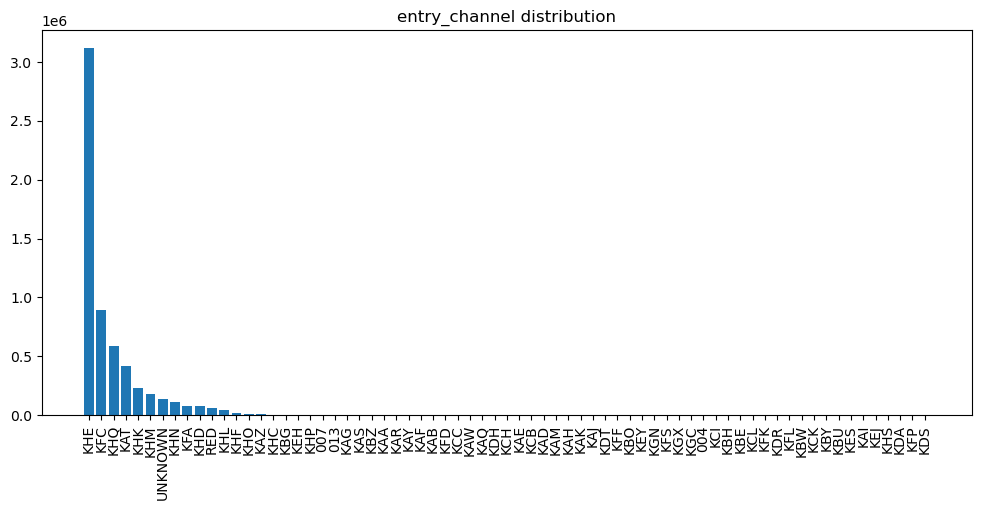

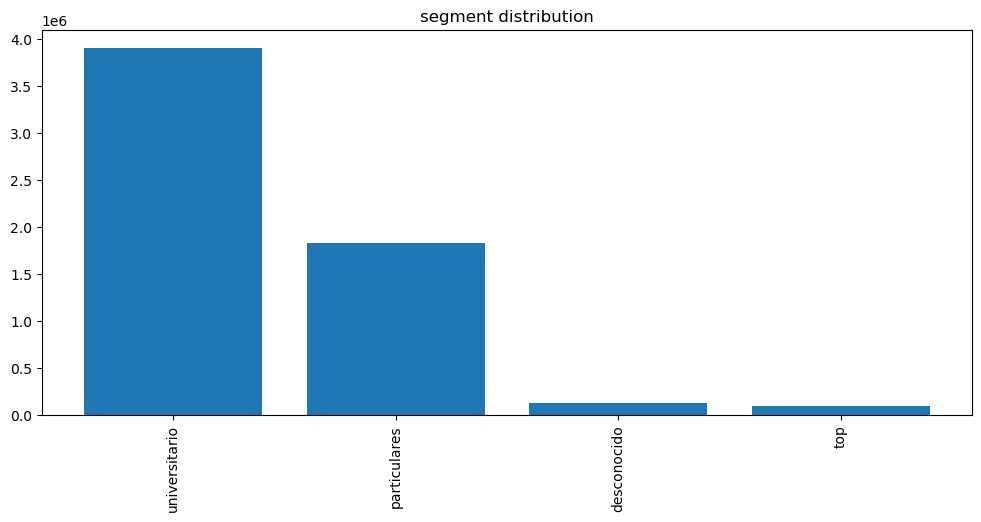

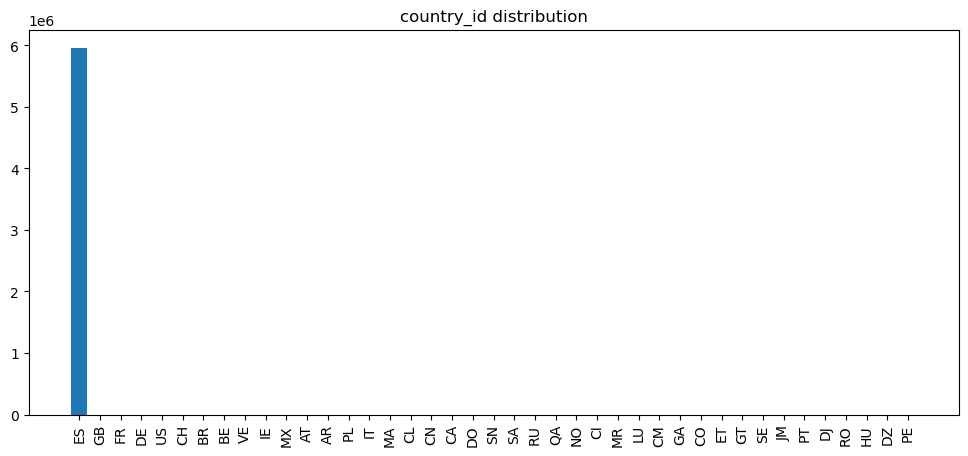

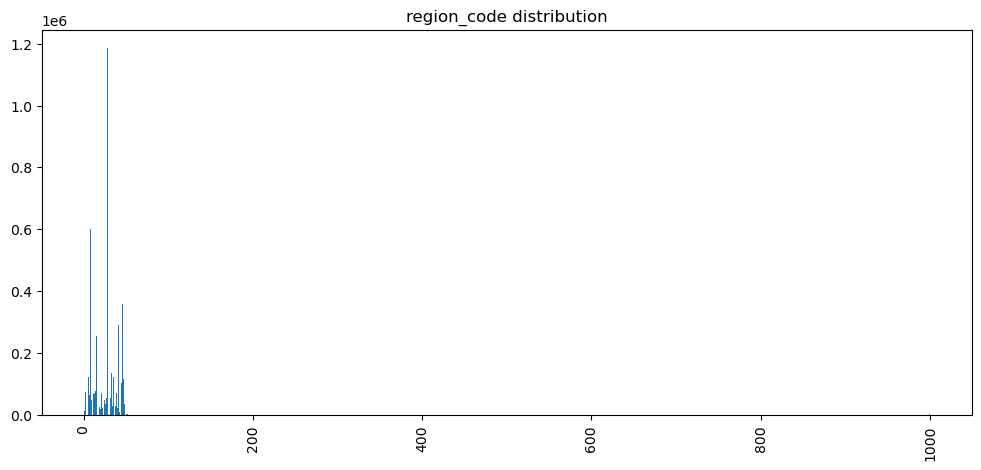

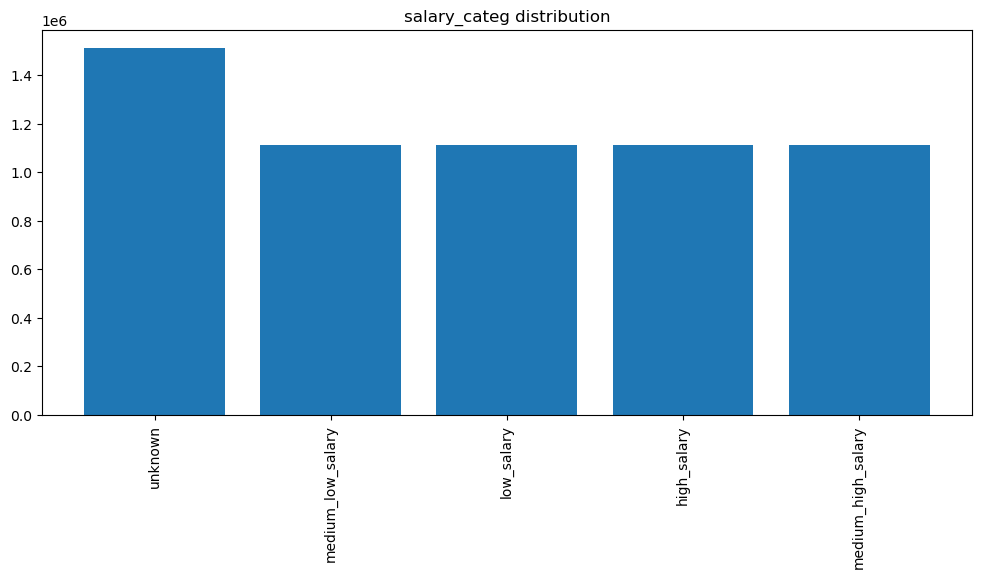

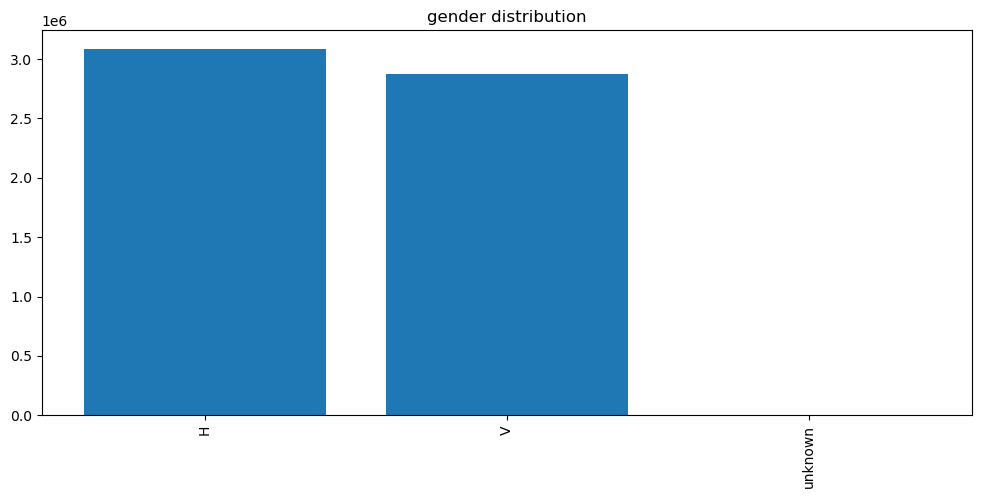

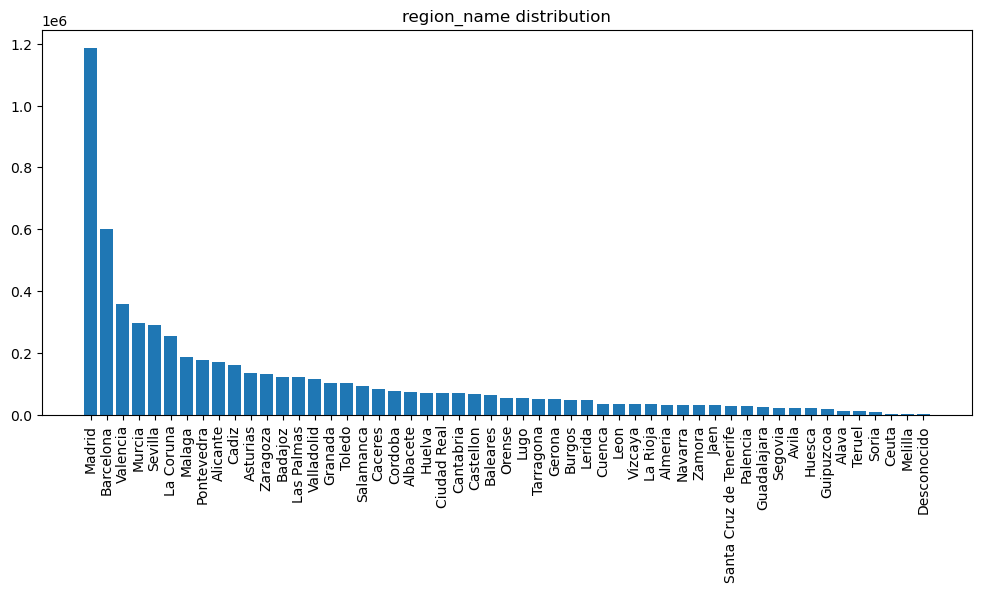

In [10]:
grafico_barras(df,categoricas)

We can observe the following:

- The 5 most frequent entry channels are KHE, KFC, KHQ, KAT, and KHK.
- The most frequent segment is the university segment.
- The majority of the data comes from Spain, with Madrid being the most common city, followed by Barcelona, Valencia, Murcia, Seville, and La Coruña.
- The sample is balanced in terms of gender.
- Individuals with a low to medium salary (first quartile of this variable) predominate in the sample.

## Discrete variables

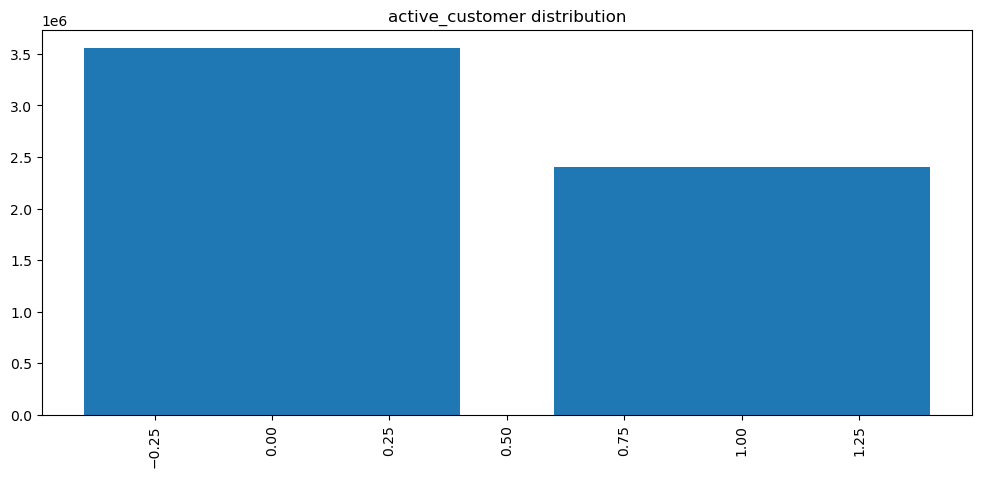

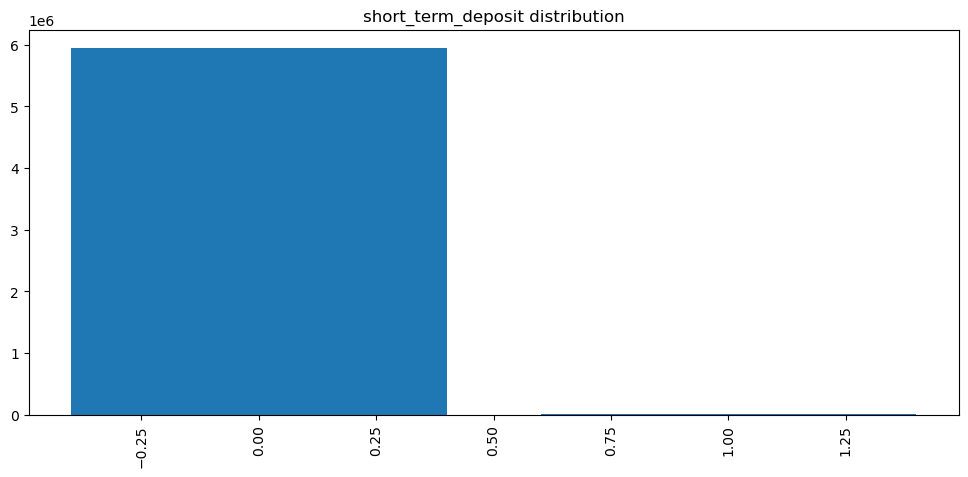

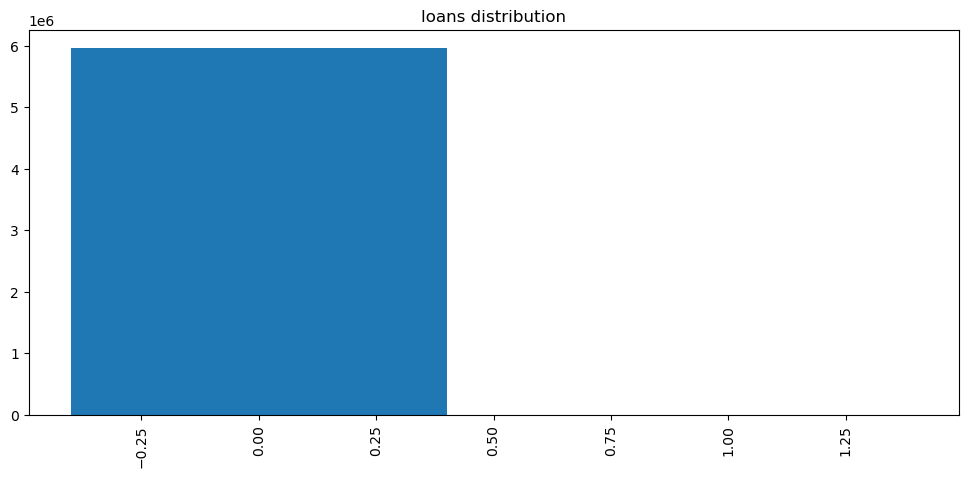

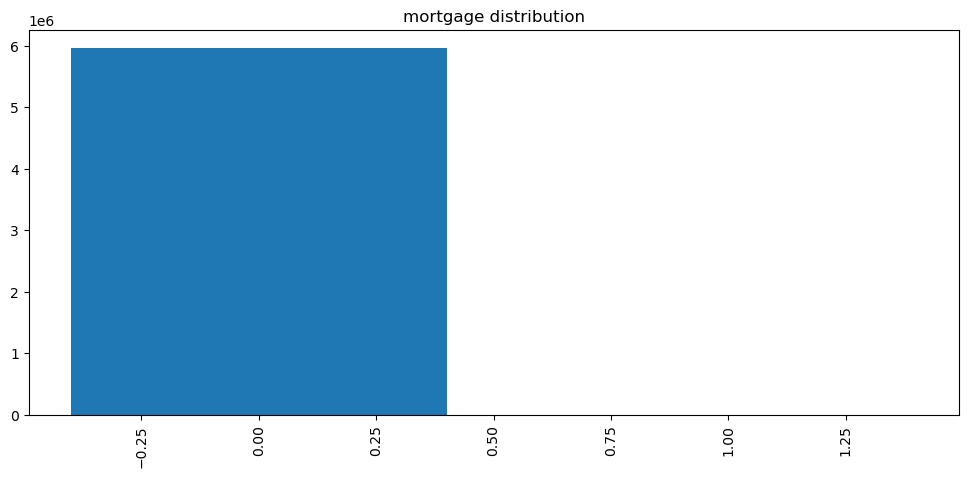

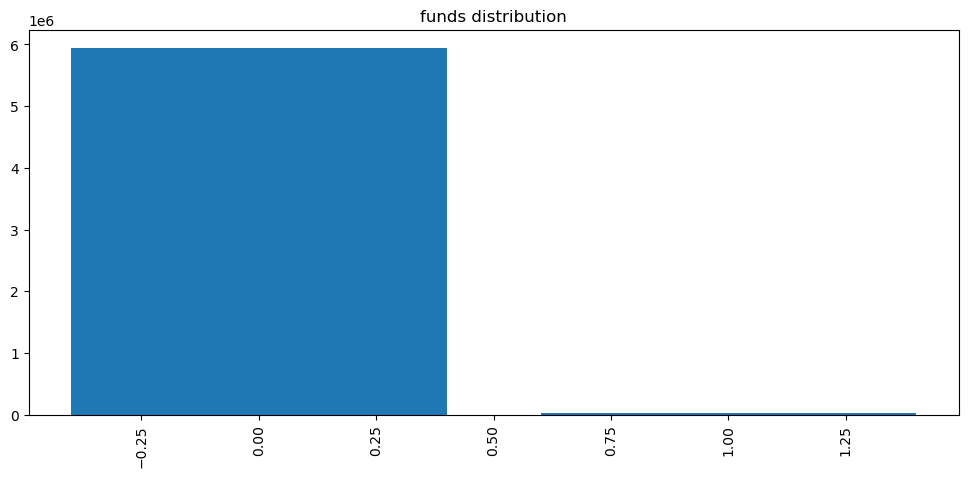

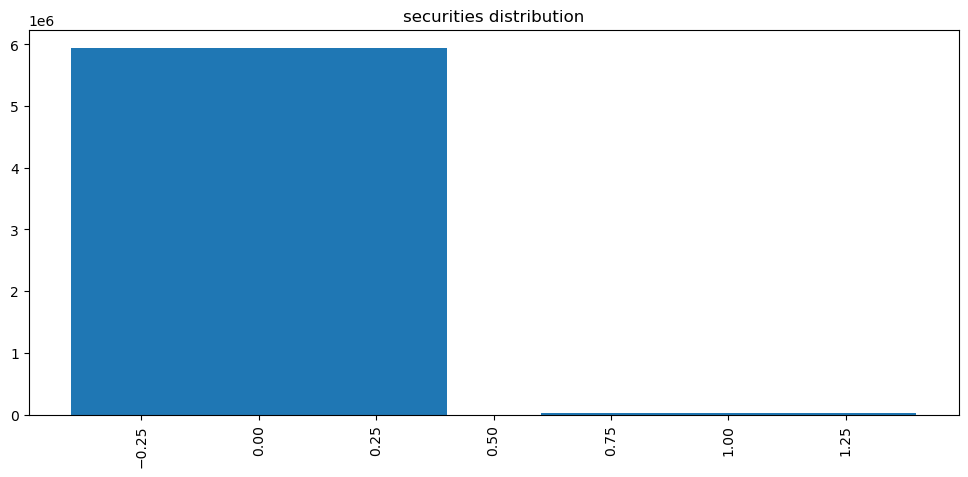

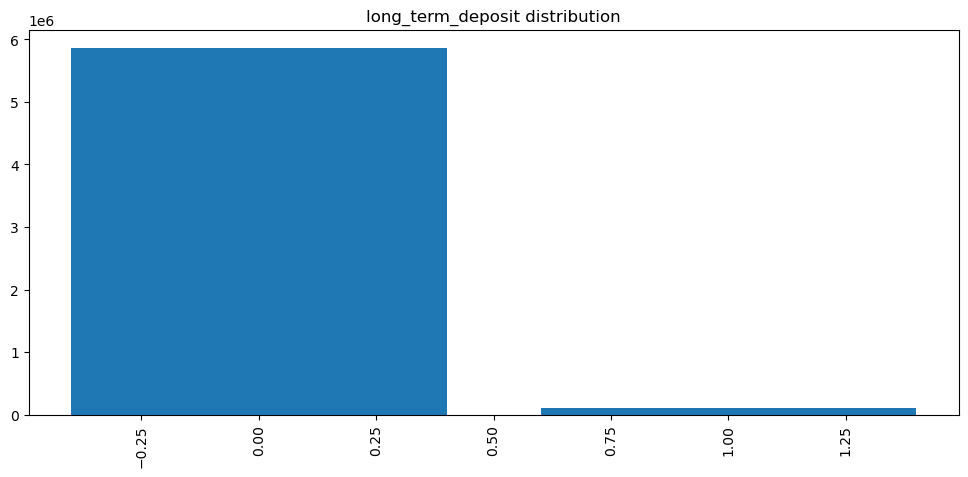

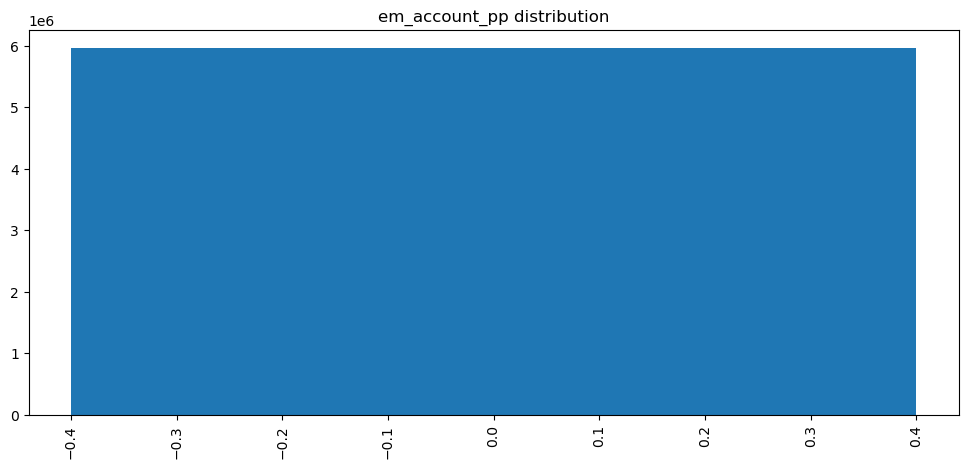

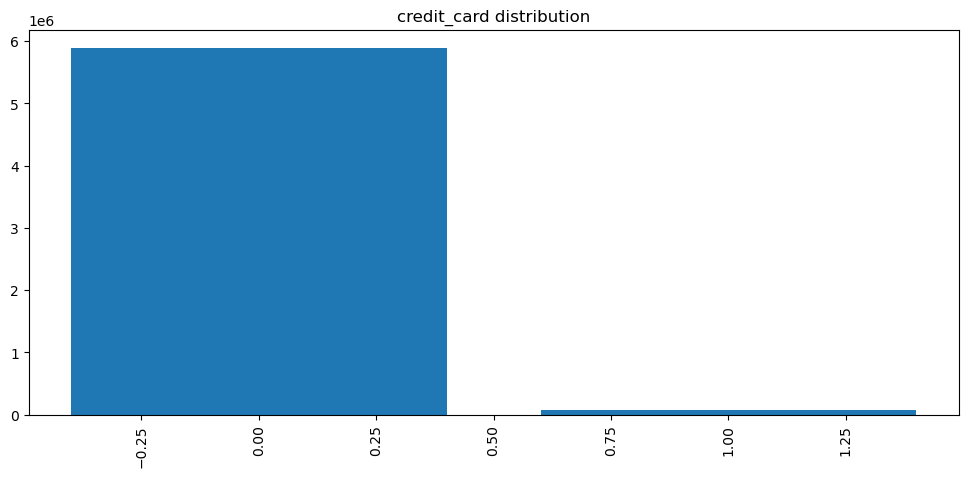

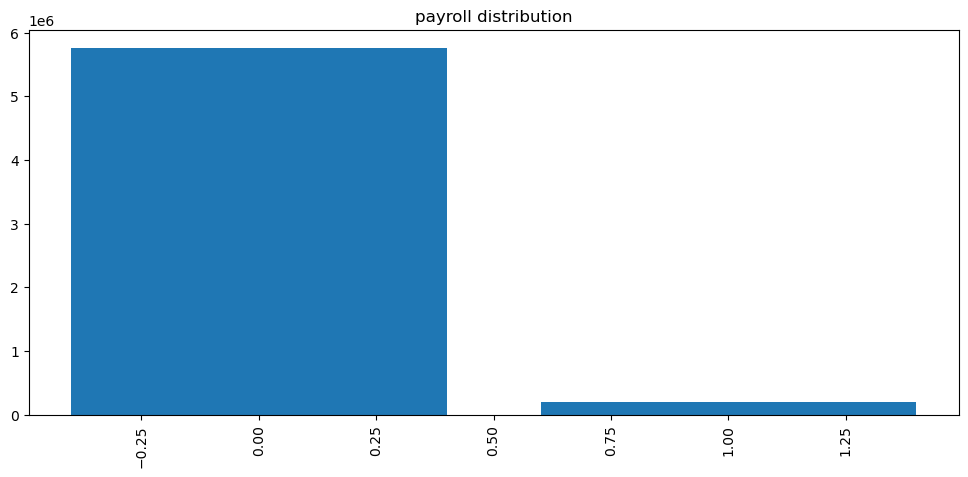

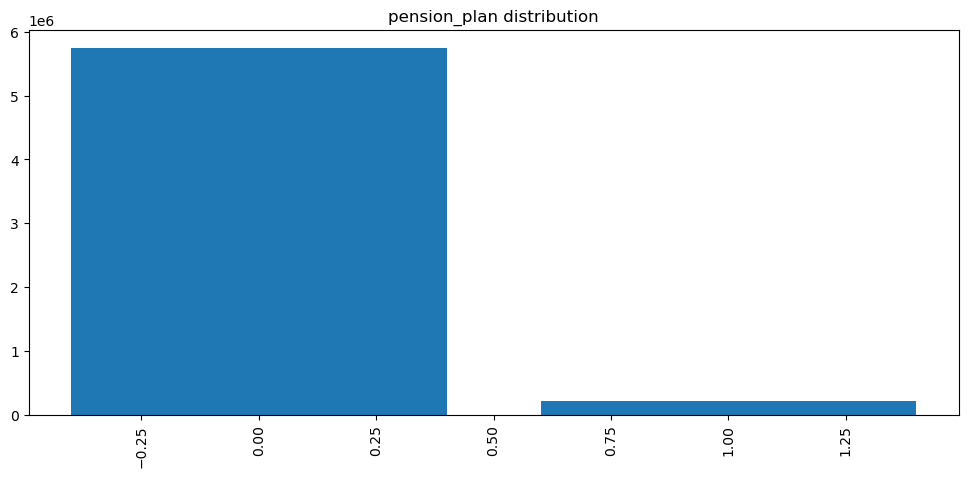

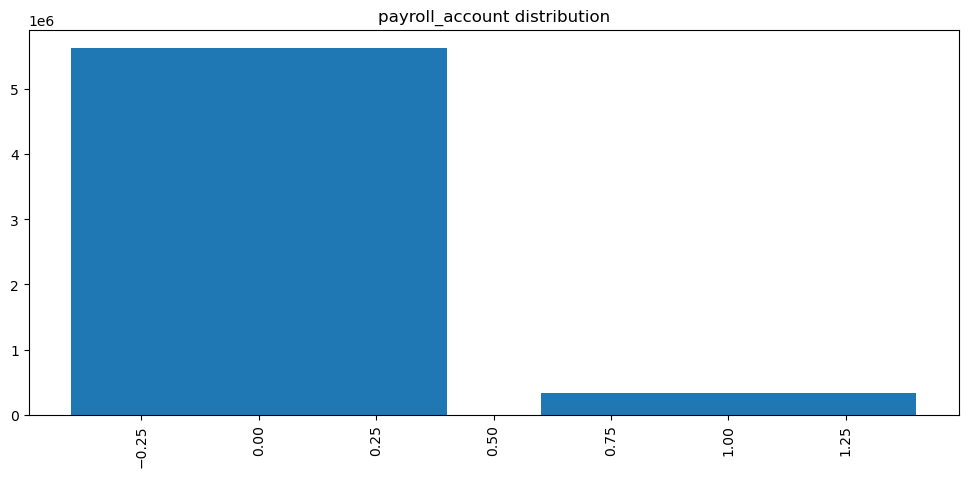

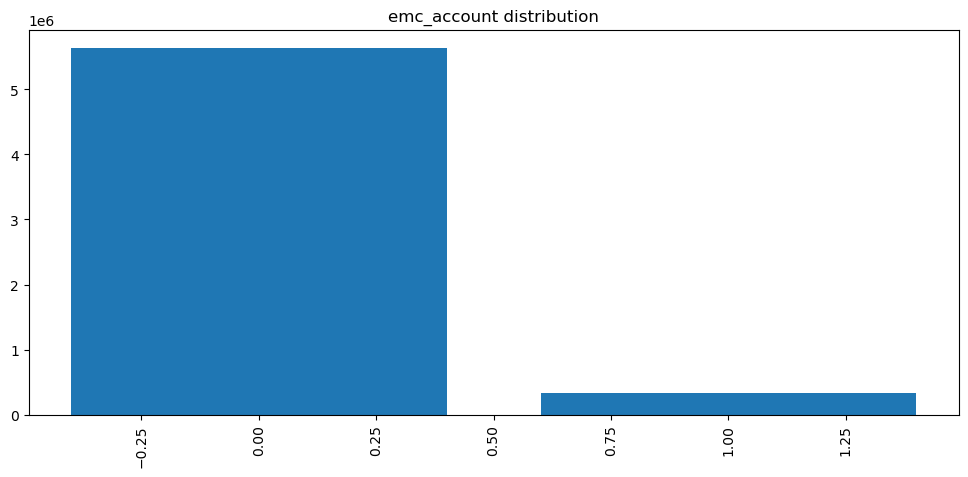

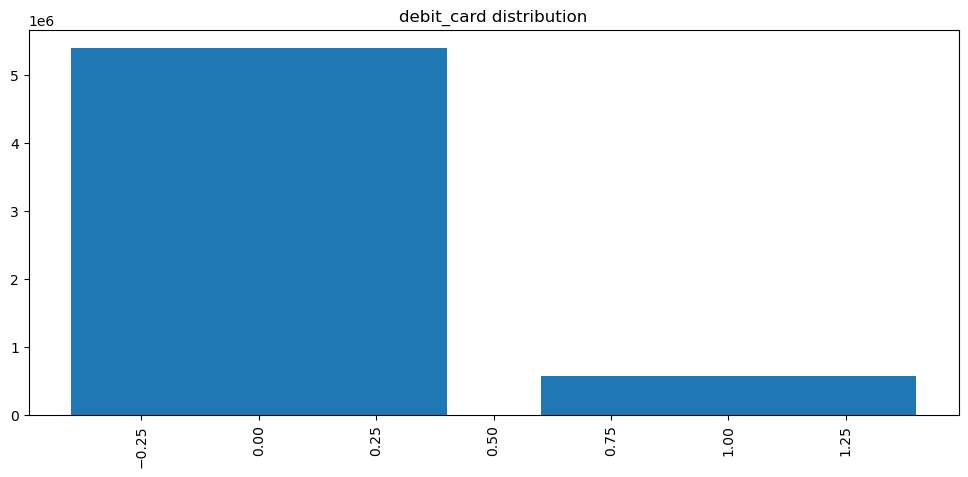

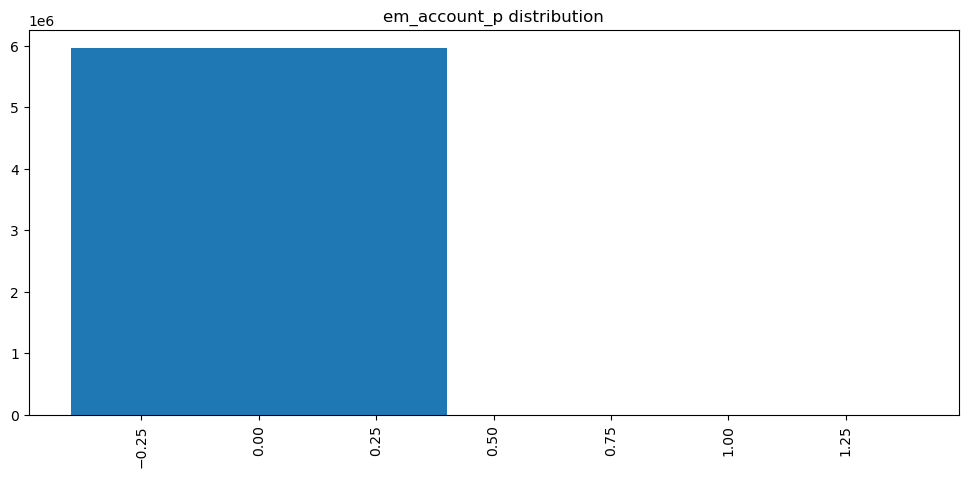

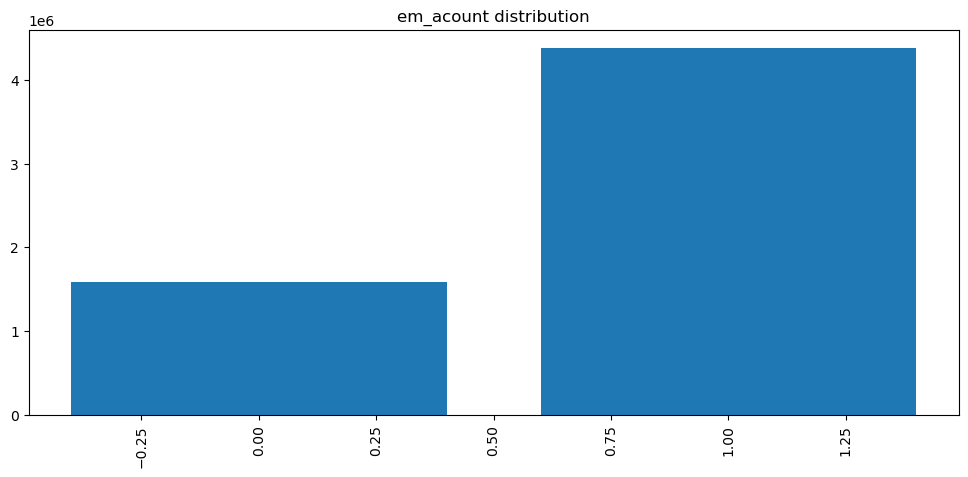

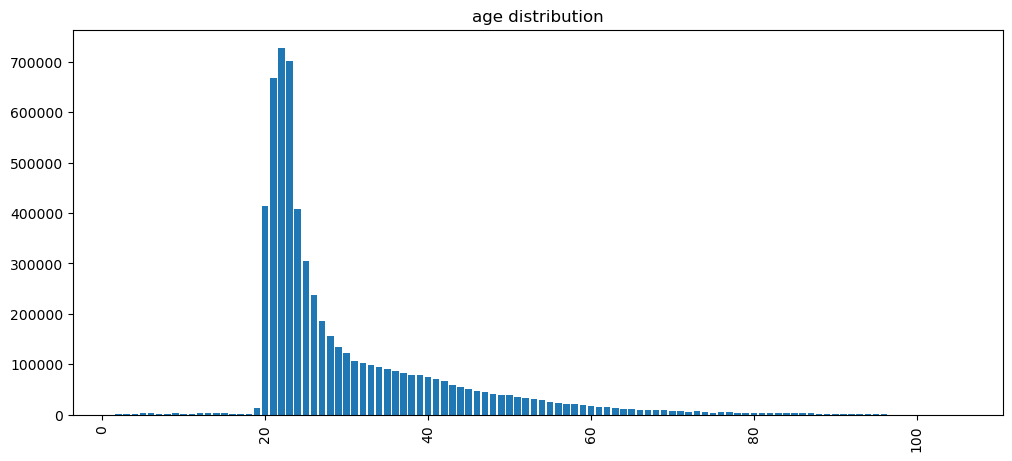

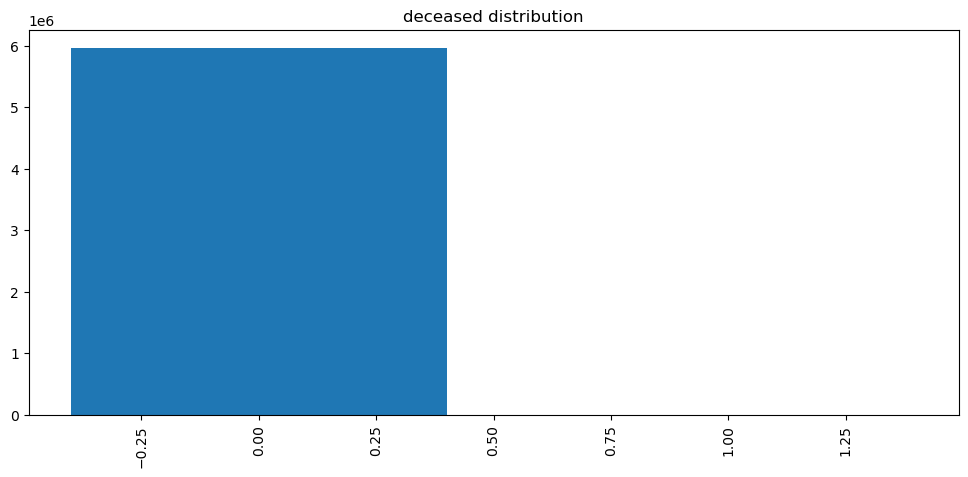

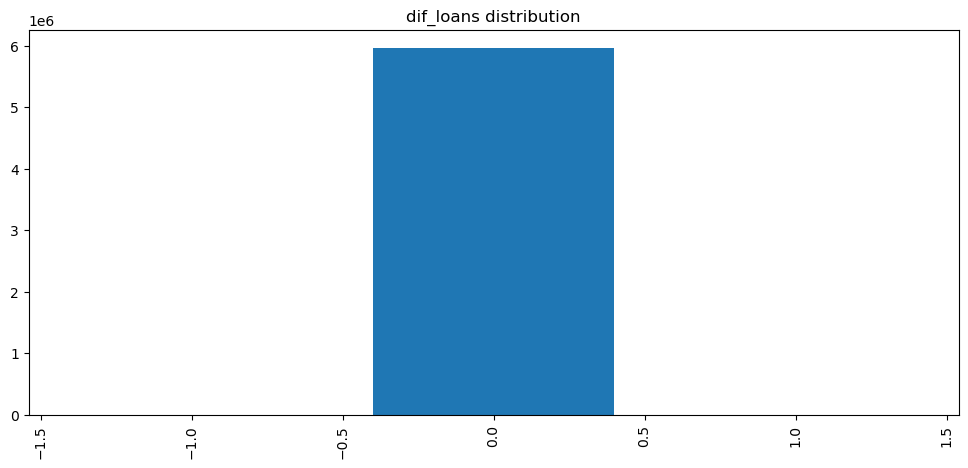

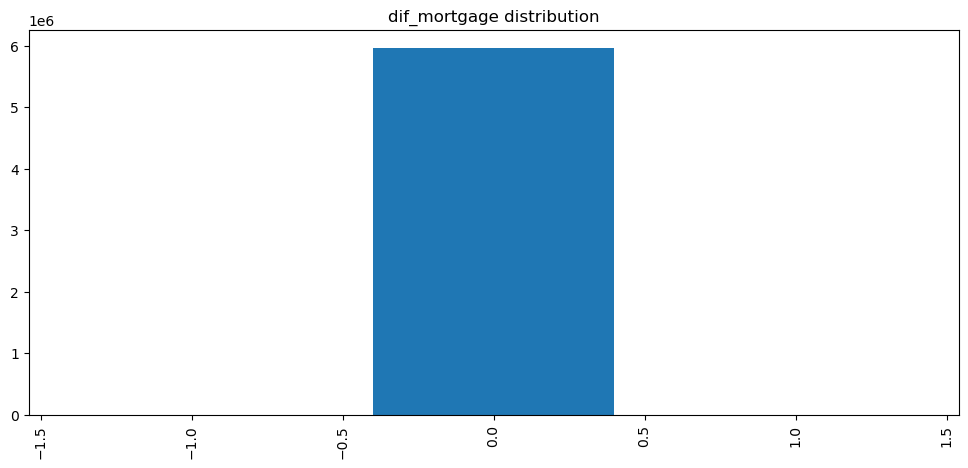

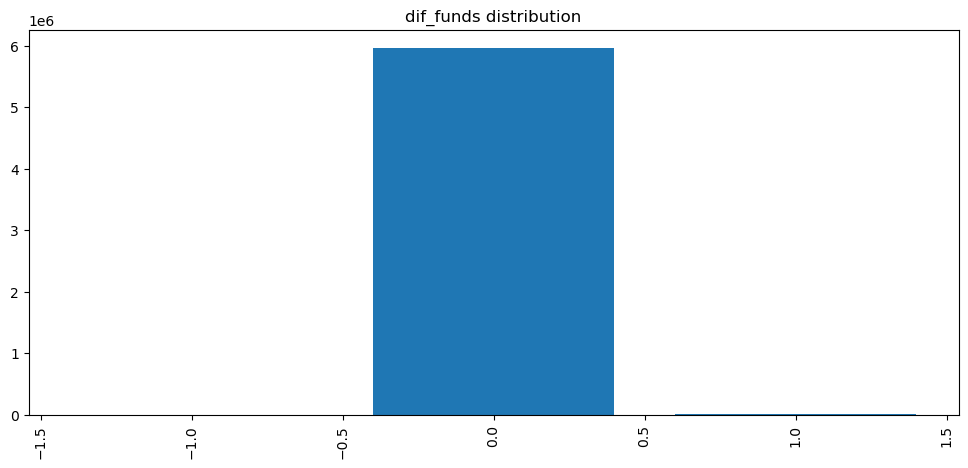

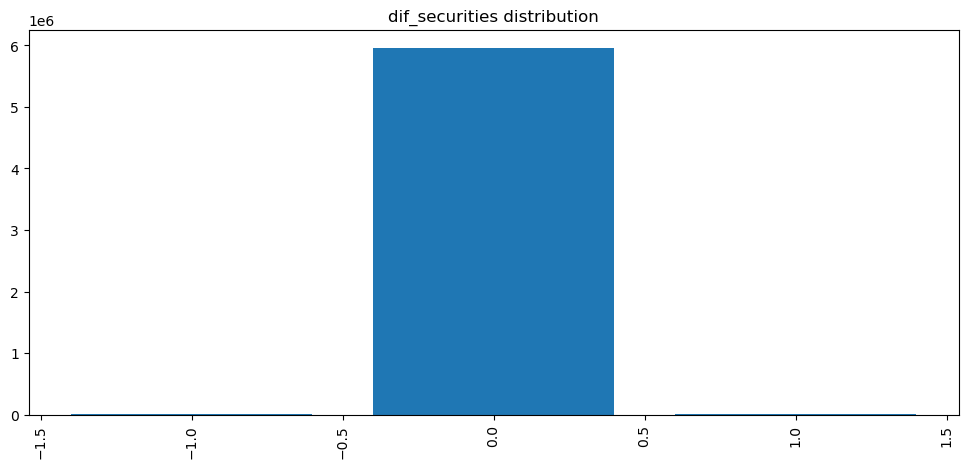

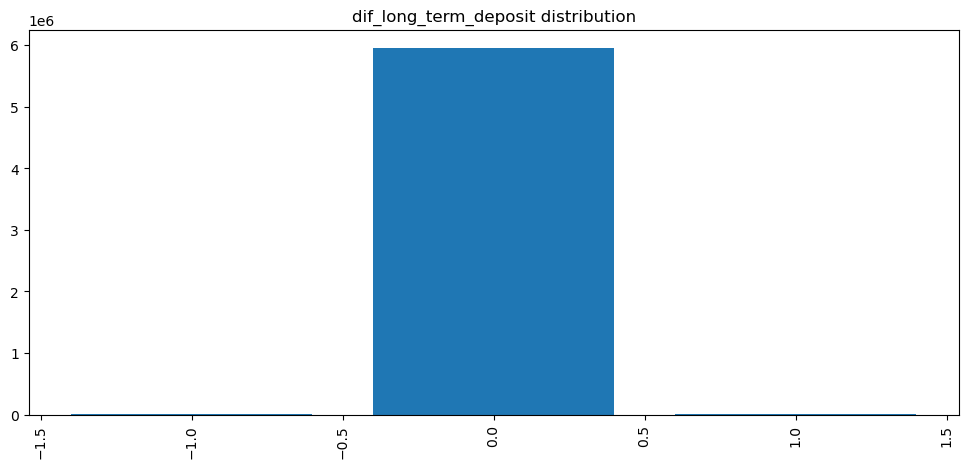

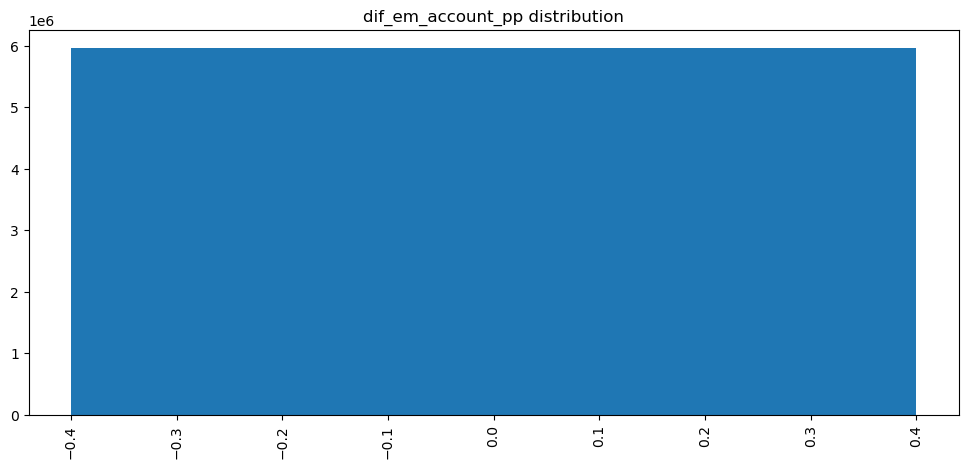

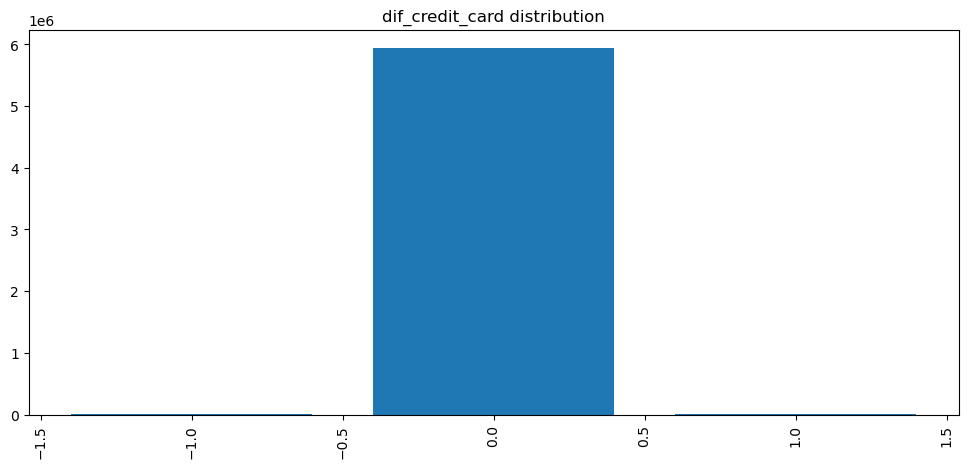

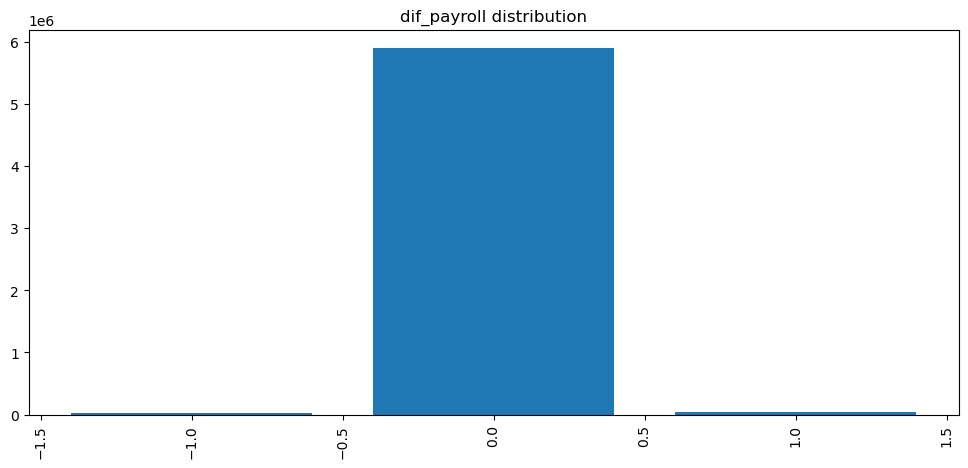

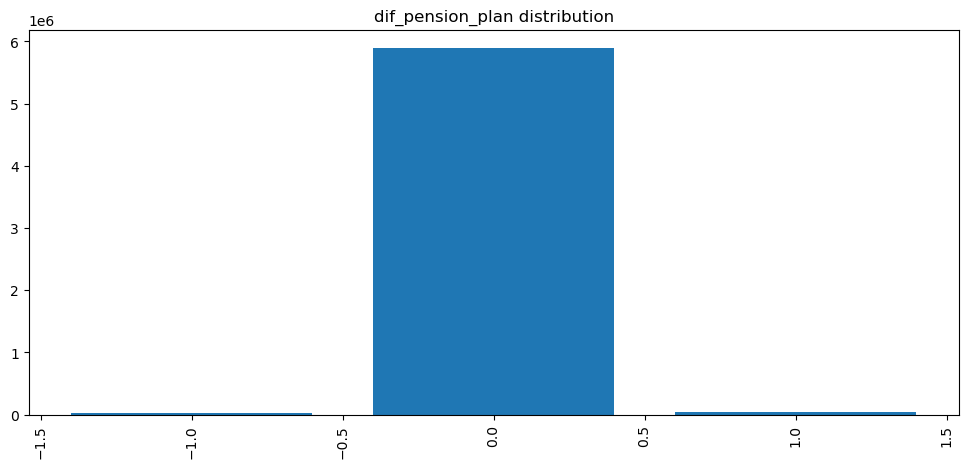

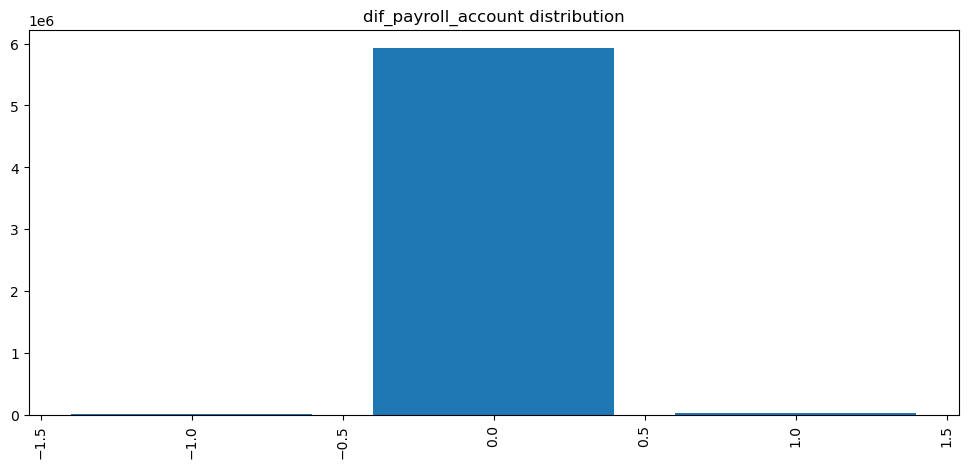

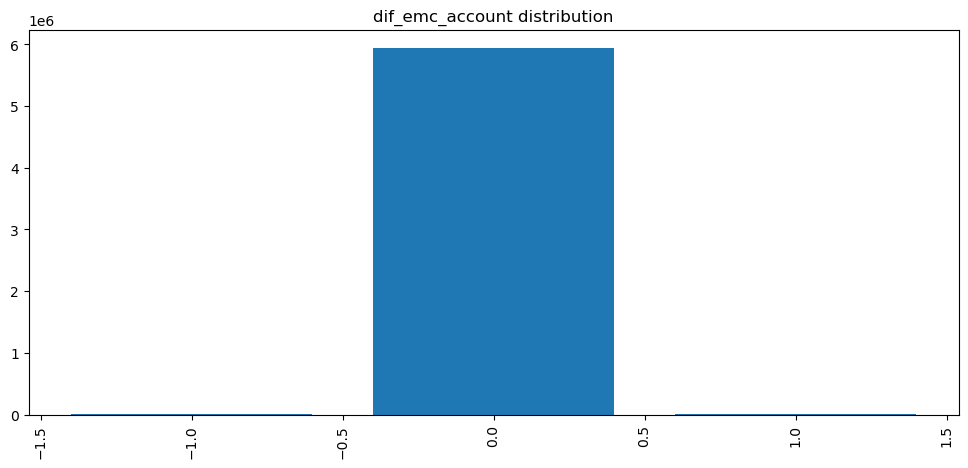

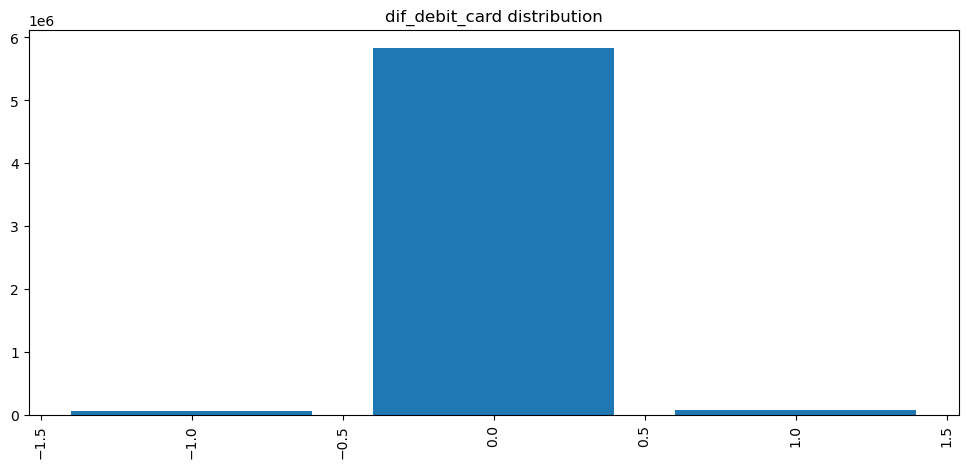

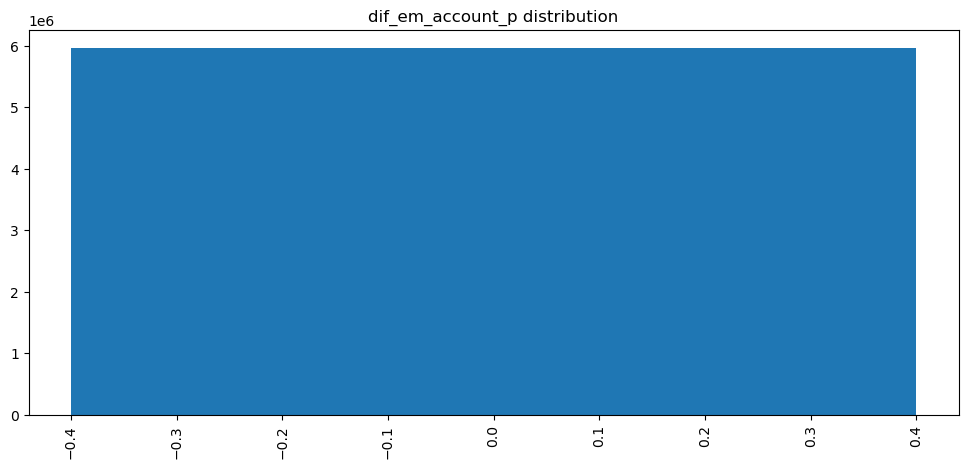

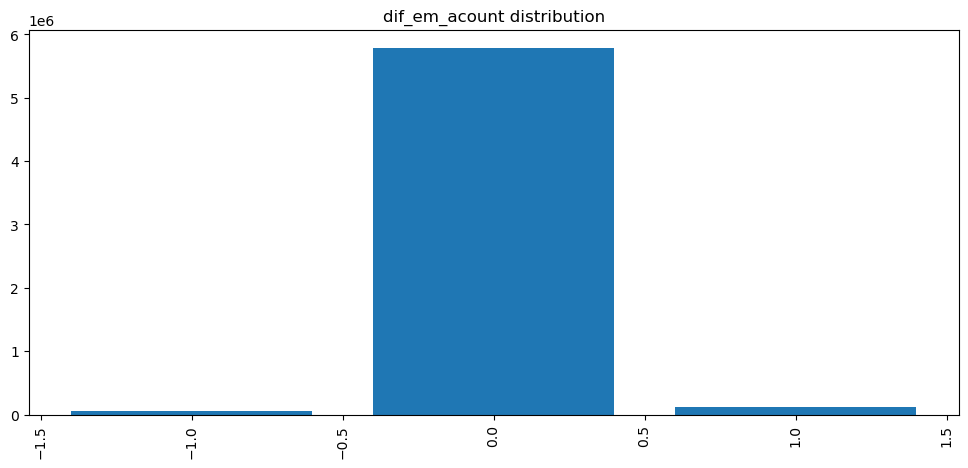

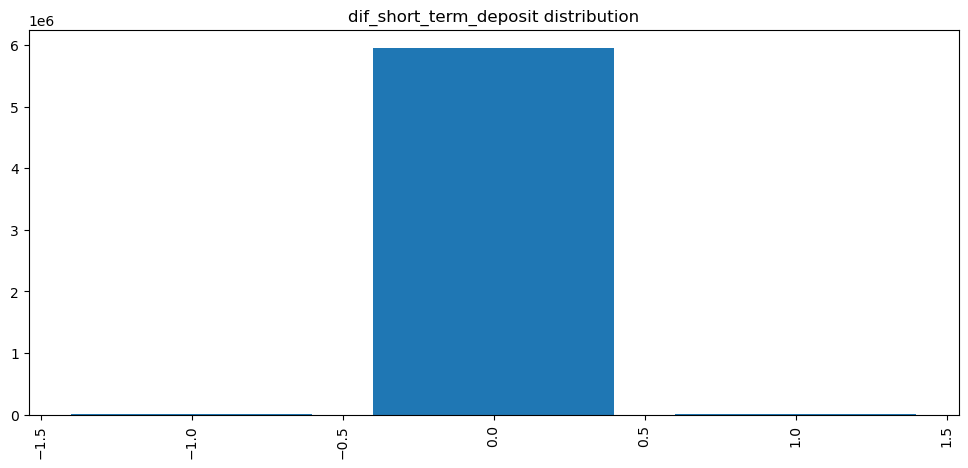

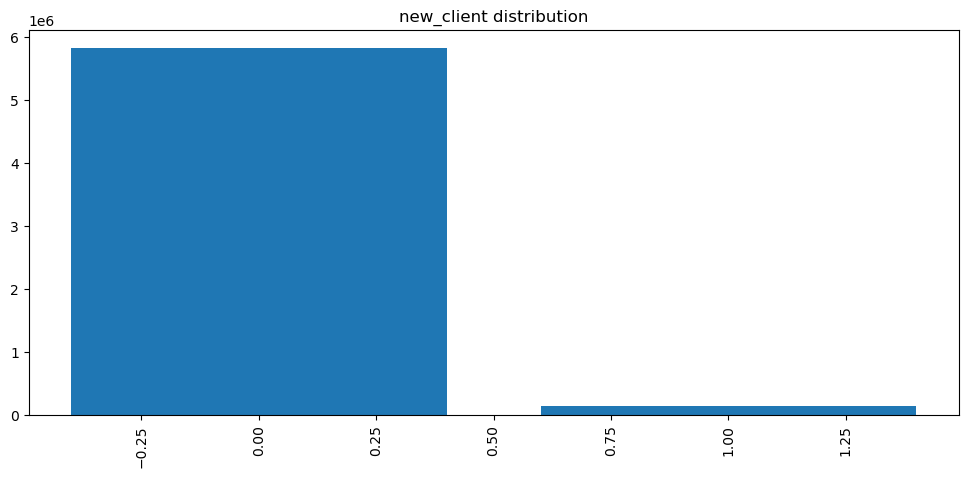

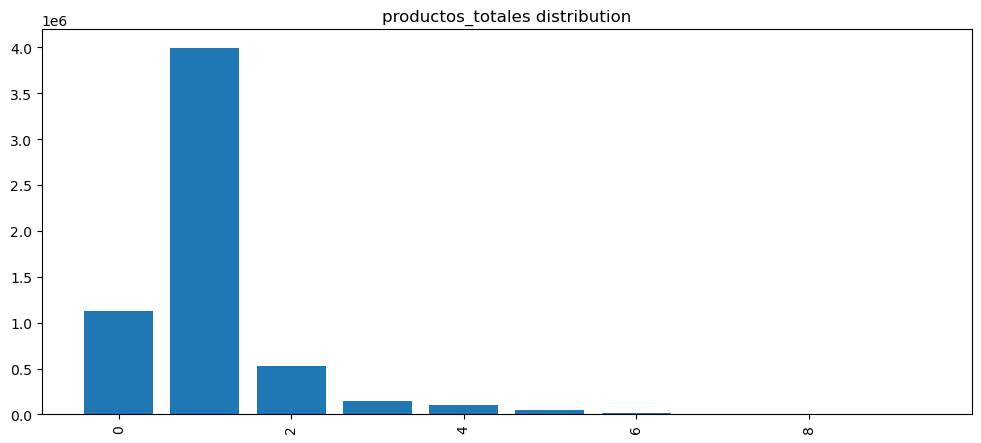

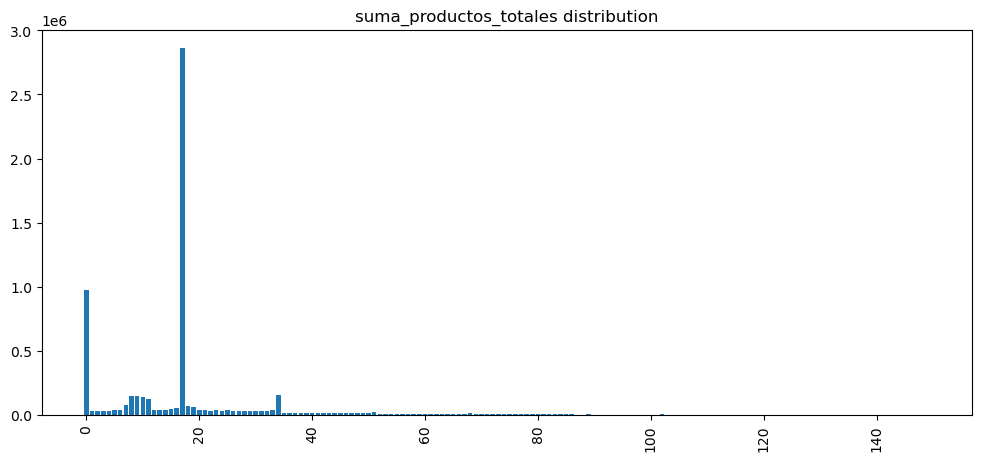

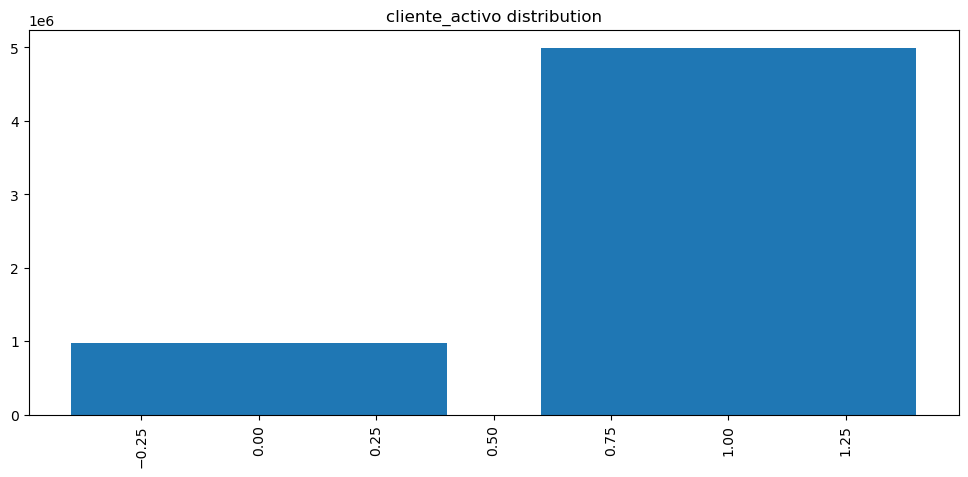

In [11]:
grafico_barras(df,discretas)

## Specific variables

### Revenue evolution

First, lets see the time evolution of total revenue

In [12]:
df_fechas=df.groupby('pk_partition')['ingresos_producto'].sum()

In [13]:
df_fechas.head(10)

pk_partition
2018-01-28     33420.0
2018-02-28    254660.0
2018-03-28    258740.0
2018-04-28    238220.0
2018-05-28    230220.0
2018-06-28    308650.0
2018-07-28    380060.0
2018-08-28    365730.0
2018-09-28    441450.0
2018-10-28    480890.0
Name: ingresos_producto, dtype: float64

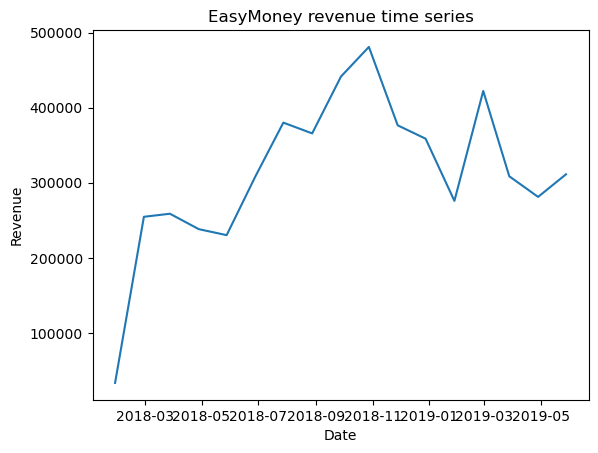

In [14]:
plt.plot(df_fechas.index,df_fechas.values)
plt.title('EasyMoney revenue time series')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

### Evolución clientes nuevos

In [15]:
df_clientes_nuevos=df.groupby('pk_partition')['new_client'].sum().reset_index()

In [16]:
df_clientes_nuevos

,pk_partition,new_client
0,2018-01-28,2543
1,2018-02-28,2720
2,2018-03-28,2368
3,2018-04-28,2032
4,2018-05-28,2301
5,2018-06-28,1918
6,2018-07-28,12995
7,2018-08-28,16677
8,2018-09-28,20252
9,2018-10-28,28303


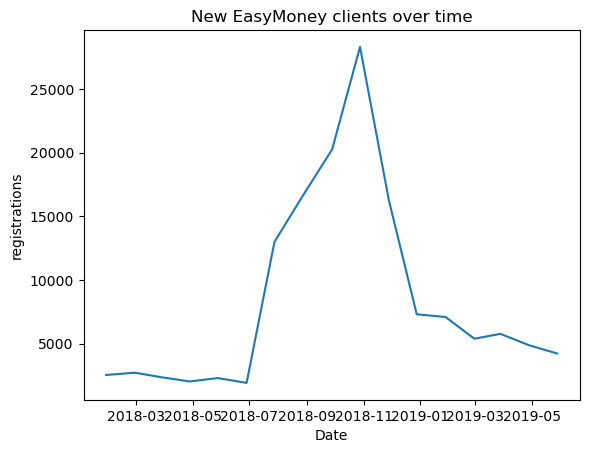

In [17]:
plt.plot(df_clientes_nuevos['pk_partition'],df_clientes_nuevos['new_client'])
plt.title('New EasyMoney clients over time')
plt.xlabel('Date')
plt.ylabel('registrations')
plt.show()

### Client registrations and cancellations

#### General client registrations and cancellations

In [18]:
primeras_dif=['dif_debit_card',              
'dif_em_account_p',               
'dif_em_account_pp',              
'dif_em_acount',                  
'dif_emc_account',                
'dif_payroll',                   
'dif_payroll_account',            
'dif_funds',                      
'dif_long_term_deposit',         
'dif_mortgage',                   
'dif_pension_plan',               
'dif_securities',                
'dif_short_term_deposit',        
'dif_loans',                      
'dif_credit_card']

In [19]:
count_1 = {}
count_minus_1 = {}

# iterating over columns in the list above
for i in primeras_dif:
    # counting number of elements == 1
    count_1[i] = np.sum(df[i] == 1)
    
    # counting number of elements == -1
    count_minus_1[i] = np.sum(df[i] == -1)

# showing results
print("1 Count:")
print(count_1)

print("\n-1 Count:")
print(count_minus_1)

1 Count:
{'dif_debit_card': 74206, 'dif_em_account_p': 0, 'dif_em_account_pp': 0, 'dif_em_acount': 125531, 'dif_emc_account': 14411, 'dif_payroll': 34858, 'dif_payroll_account': 22261, 'dif_funds': 916, 'dif_long_term_deposit': 4540, 'dif_mortgage': 10, 'dif_pension_plan': 37551, 'dif_securities': 1305, 'dif_short_term_deposit': 4373, 'dif_loans': 25, 'dif_credit_card': 11072}

-1 Count:
{'dif_debit_card': 55524, 'dif_em_account_p': 0, 'dif_em_account_pp': 0, 'dif_em_acount': 50919, 'dif_emc_account': 5001, 'dif_payroll': 26792, 'dif_payroll_account': 9375, 'dif_funds': 389, 'dif_long_term_deposit': 3388, 'dif_mortgage': 2, 'dif_pension_plan': 29154, 'dif_securities': 455, 'dif_short_term_deposit': 5339, 'dif_loans': 14, 'dif_credit_card': 9689}


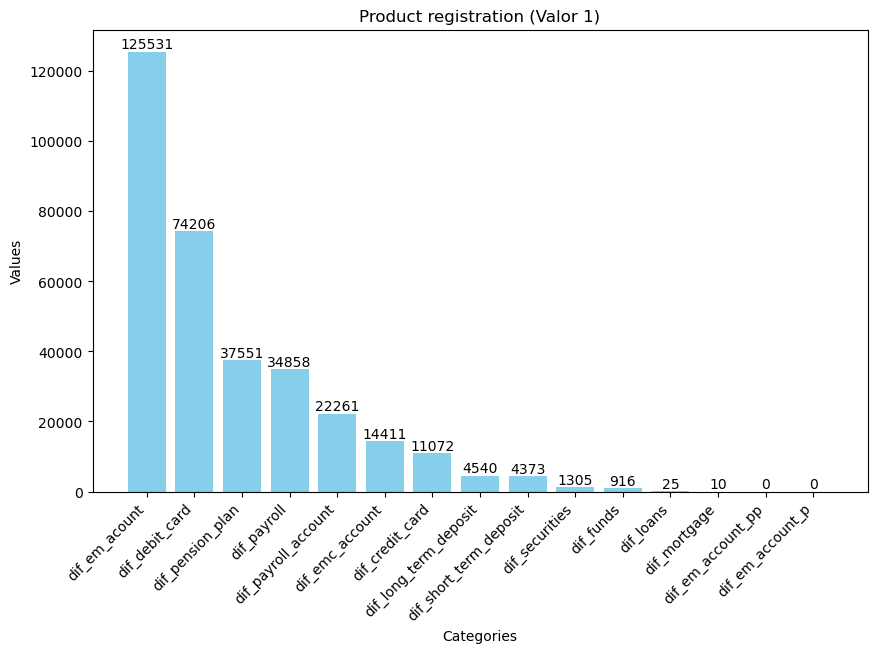

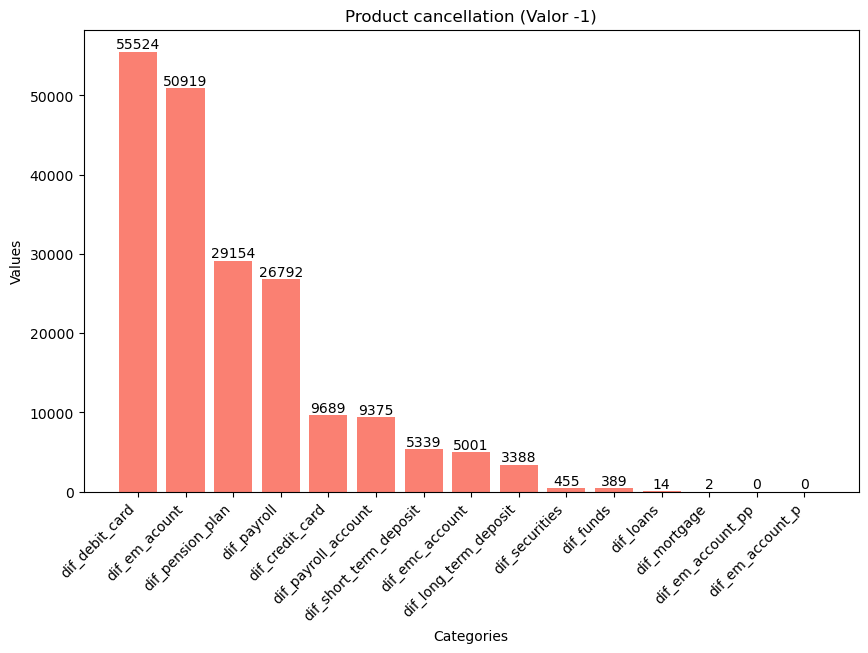

In [20]:
import matplotlib.pyplot as plt

# Suppose you have the results stored in count_1 and count_minus_1

# Creating bar chart for 1
nombres_1, valores_1 = zip(*count_1.items())
sorted_data_1 = sorted(zip(valores_1, nombres_1), reverse=True)
valores_1, nombres_1 = zip(*sorted_data_1)

fig, ax1 = plt.subplots(figsize=(10, 6))
bars_1 = ax1.bar(nombres_1, valores_1, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Product registration (Valor 1)')

for bar in bars_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()

# Creating bar chart for -1
nombres_minus_1, valores_minus_1 = zip(*count_minus_1.items())
sorted_data_minus_1 = sorted(zip(valores_minus_1, nombres_minus_1), reverse=True)
valores_minus_1, nombres_minus_1 = zip(*sorted_data_minus_1)

fig, ax2 = plt.subplots(figsize=(10, 6))
bars_minus_1 = ax2.bar(nombres_minus_1, valores_minus_1, color='salmon')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Product cancellation (Valor -1)')

for bar in bars_minus_1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.show()


In [21]:
resultados=[]
for col_name in primeras_dif:
    try:
        col_index = df.columns.get_loc(col_name)
        nombre_columna = col_name
        suma_columna = df[col_name].sum()
        resultados.append((nombre_columna, suma_columna))
    except KeyError:
        print(f"col '{col_name}' is not in the DataFrame.")

print(resultados)

[('dif_debit_card', 18682), ('dif_em_account_p', 0), ('dif_em_account_pp', 0), ('dif_em_acount', 74612), ('dif_emc_account', 9410), ('dif_payroll', 8066), ('dif_payroll_account', 12886), ('dif_funds', 527), ('dif_long_term_deposit', 1152), ('dif_mortgage', 8), ('dif_pension_plan', 8397), ('dif_securities', 850), ('dif_short_term_deposit', -966), ('dif_loans', 11), ('dif_credit_card', 1383)]


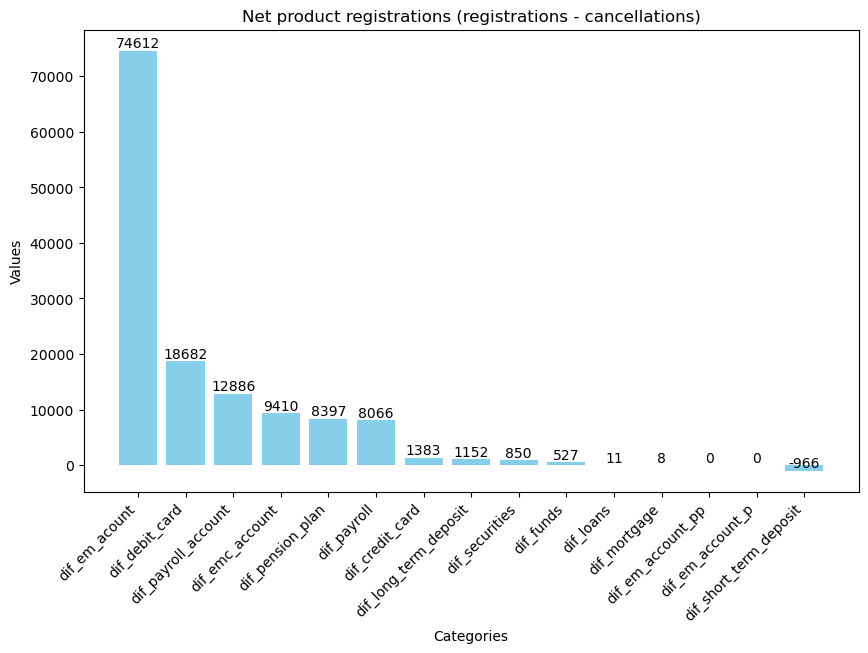

In [22]:
import matplotlib.pyplot as plt

nombres, valores = zip(*resultados)

sorted_data = sorted(zip(valores, nombres), reverse=True)
valores, nombres = zip(*sorted_data)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(nombres, valores, color='skyblue')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Net product registrations (registrations - cancellations)')

# showing values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

plt.show()


We can see that the flagship product is the EM account, followed by the debit card. As for the least popular products, we find the EM account PP and EM account P. Since these are products for which we only earn 10 euros, we can suggest eliminating them.

#### Total registrations and cancellations by product

In [23]:
productos=['loans', 'mortgage', 'funds', 'securities',
           'long_term_deposit', 'em_account_pp', 'credit_card',
           'payroll', 'pension_plan', 'payroll_account', 'emc_account',
           'debit_card', 'em_account_p', 'em_acount', 'short_term_deposit']

In [24]:
def grafico_altas_bajas_mensuales (dataset, variable):
    fig = plt.figure(figsize = (10, 8))
    altas_=dataset[dataset['dif_'+variable] == 1].groupby(['pk_partition'])['dif_'+variable].count()
    bajas_=dataset[dataset['dif_'+variable] == -1].groupby(['pk_partition'])['dif_'+variable].count()
    # We don't have information for this for the first month
    #totals_ = dataset[dataset['pk_partition'] > '2018-02-01'].groupby(['pk_partition'])['dif_' + variable].sum()
    totales_=dataset.groupby(['pk_partition'])['dif_'+variable].sum()
    
    # graphical repr:
    locs, labels = plt.xticks()
    plt.setp(labels,rotation=45)
    plt.plot(altas_, color = "green", label = "Monthly registrations")
    plt.plot(bajas_, color = "red", label = "Monthly cancellation")
    plt.plot(totales_, color = "blue", label = "Monthly net registrations")
    plt.title(variable+" monthly sales")
    plt.legend()

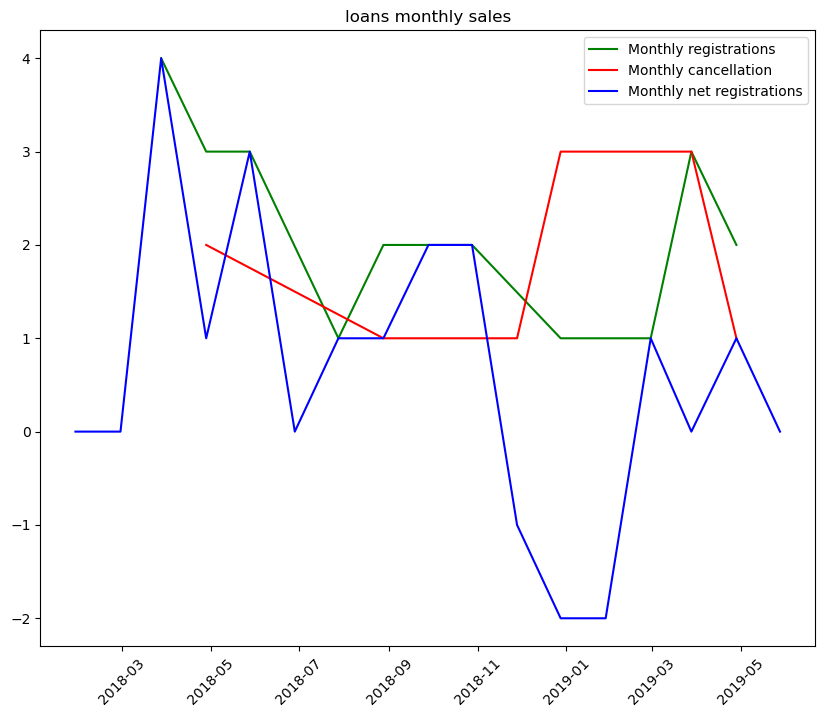

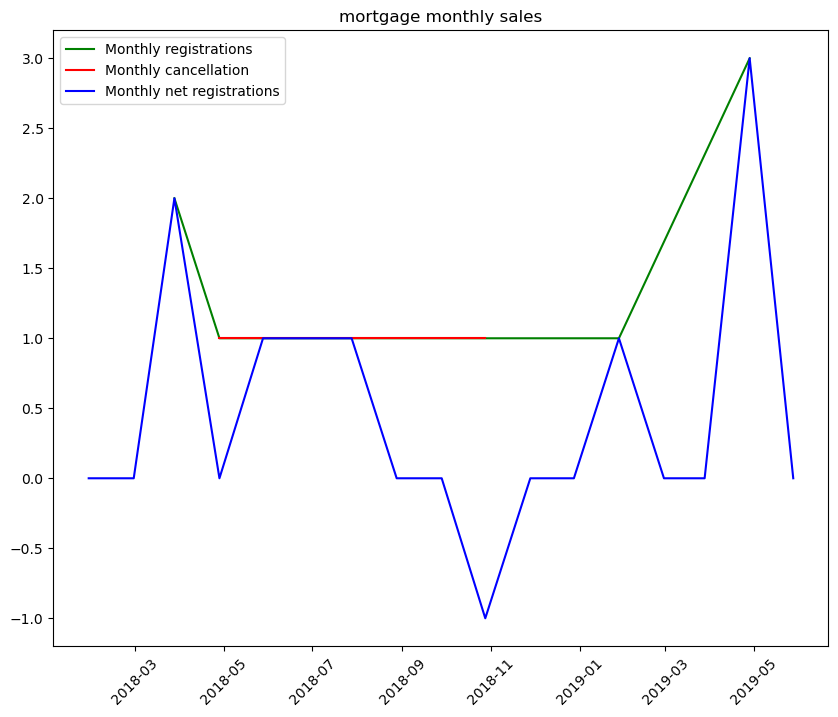

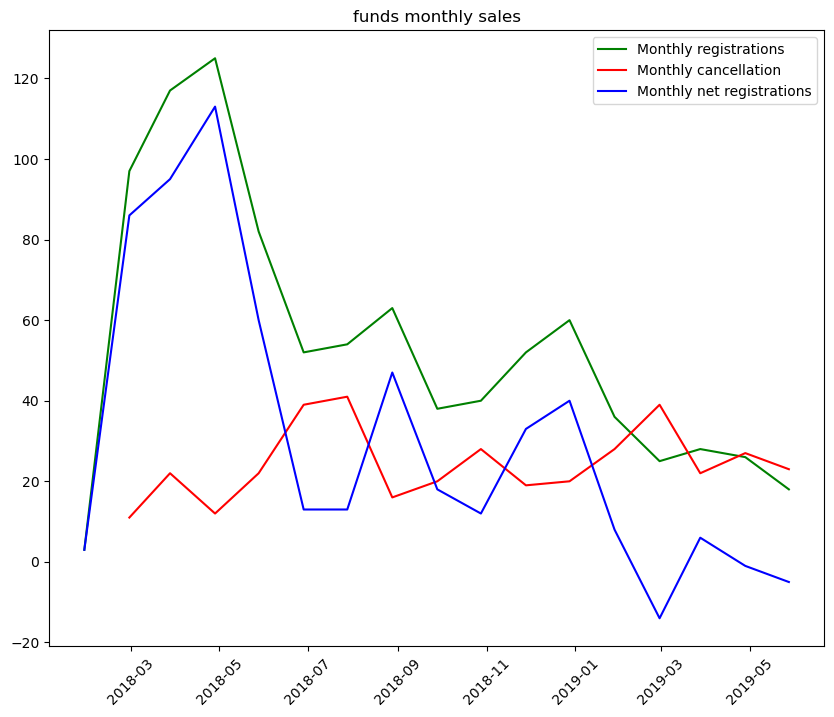

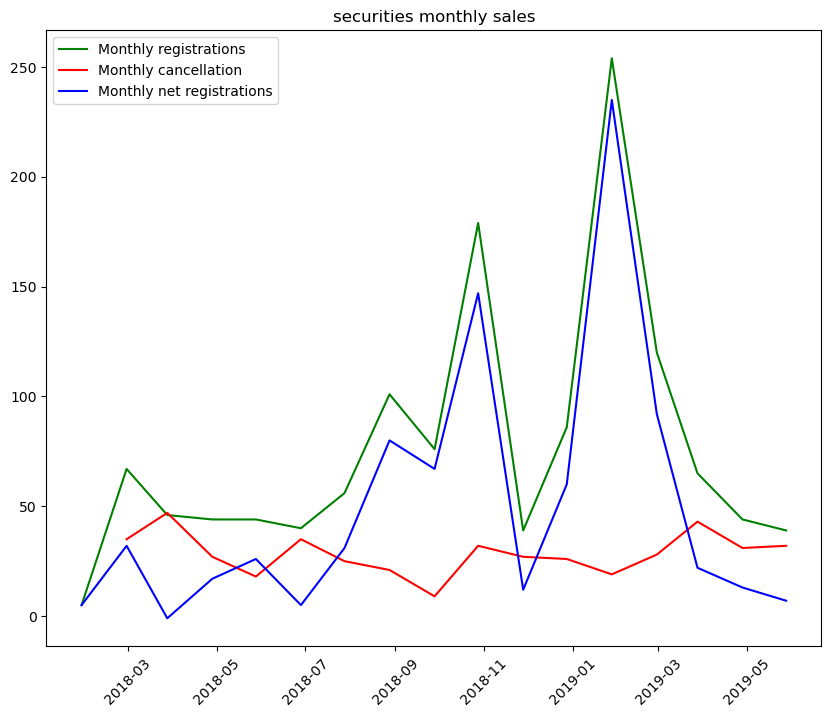

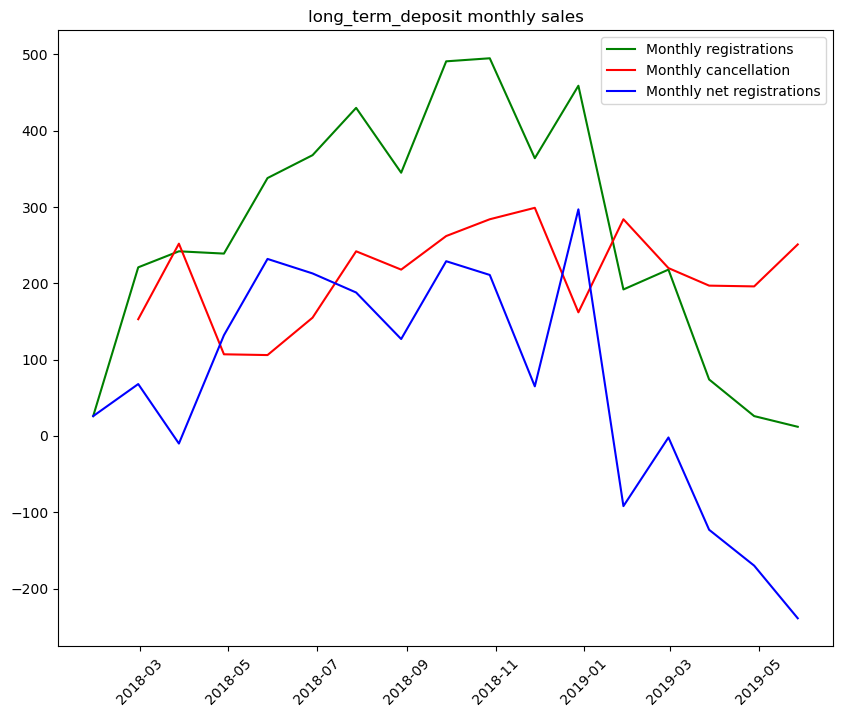

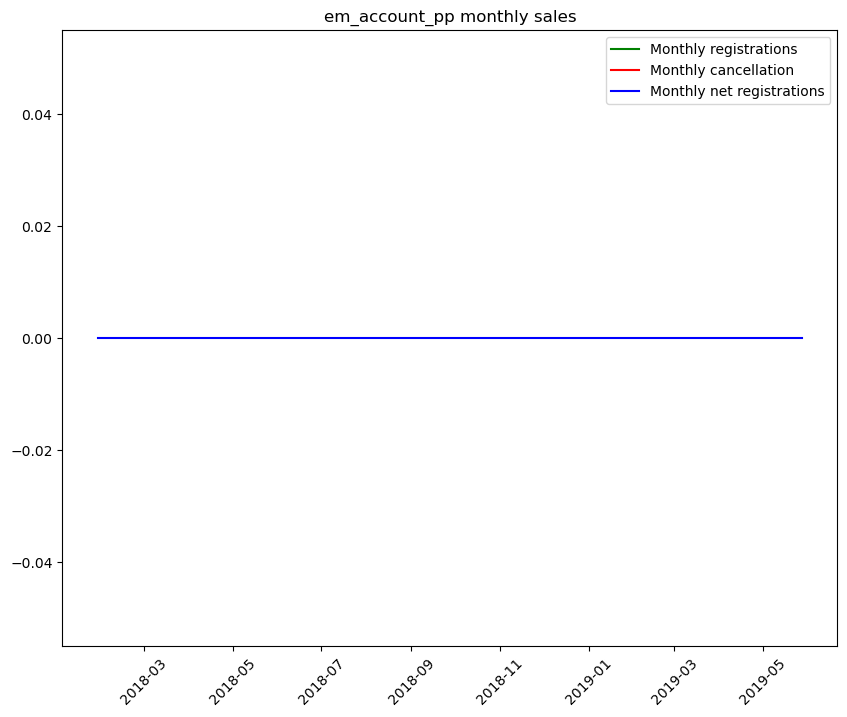

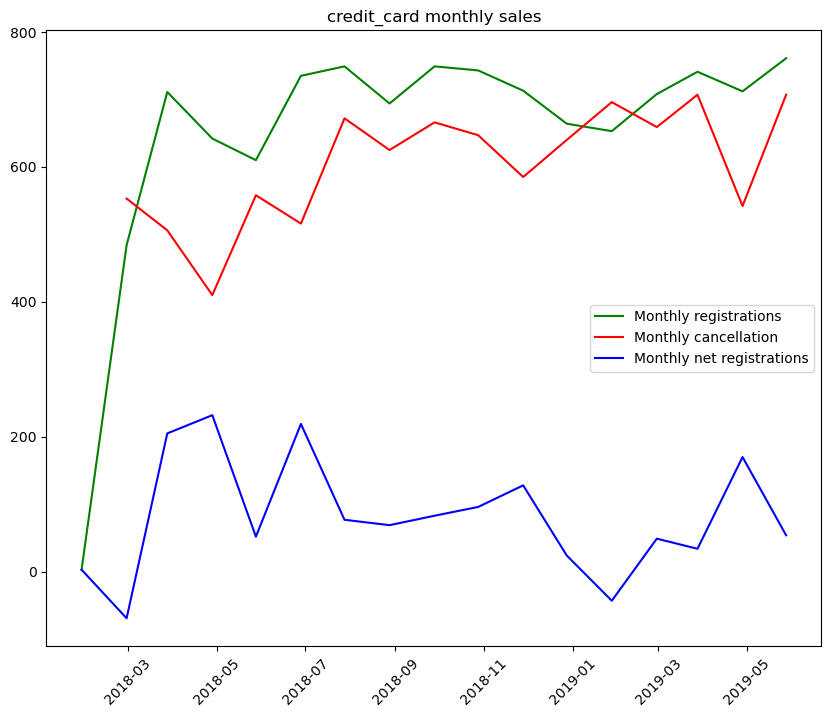

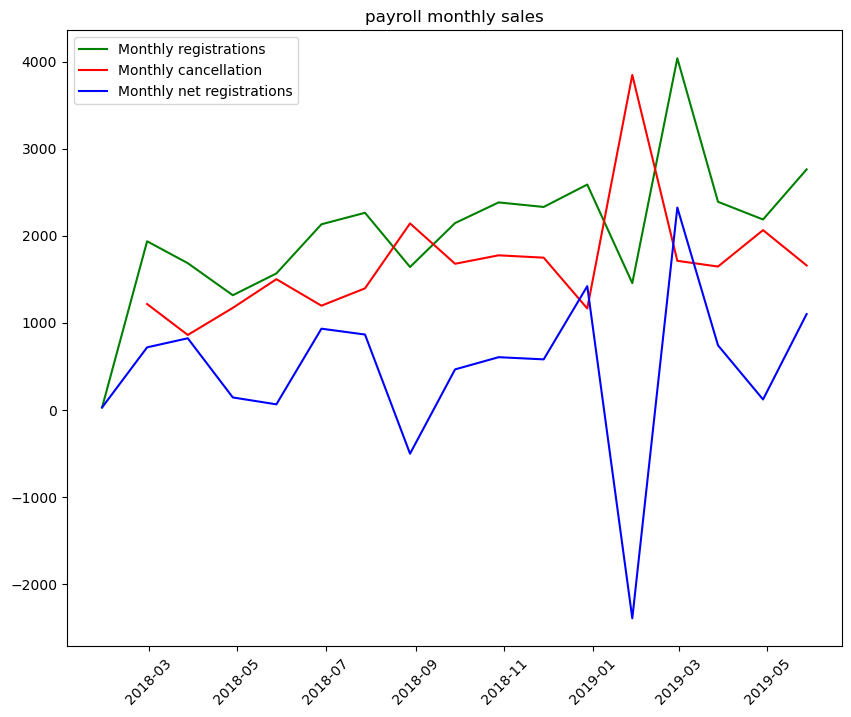

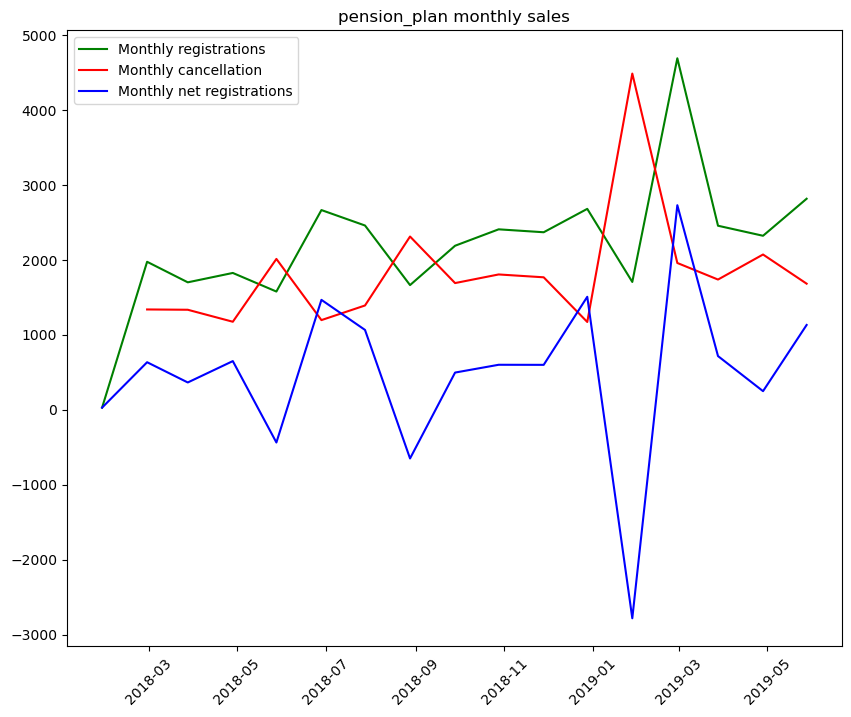

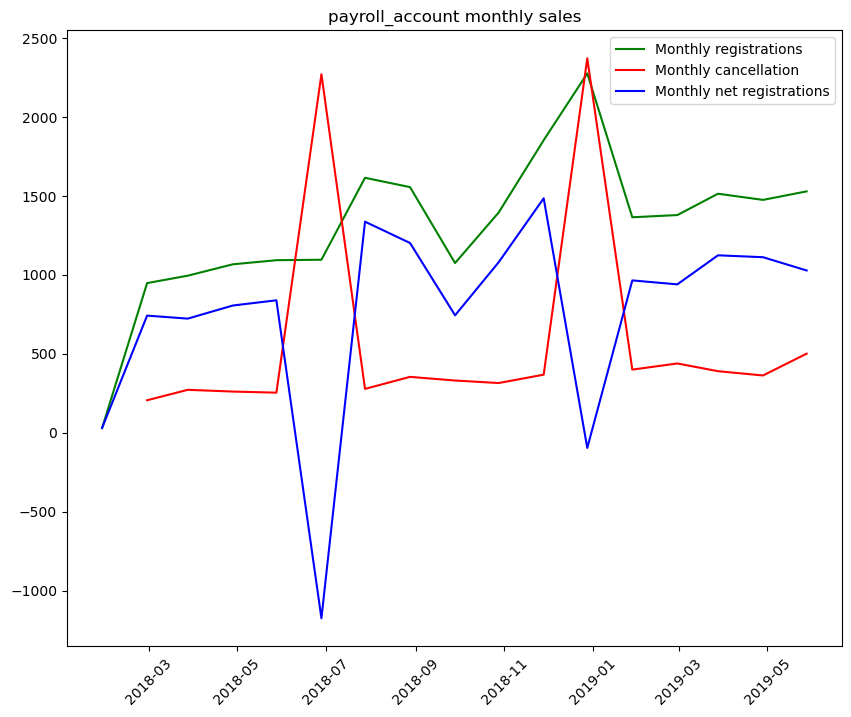

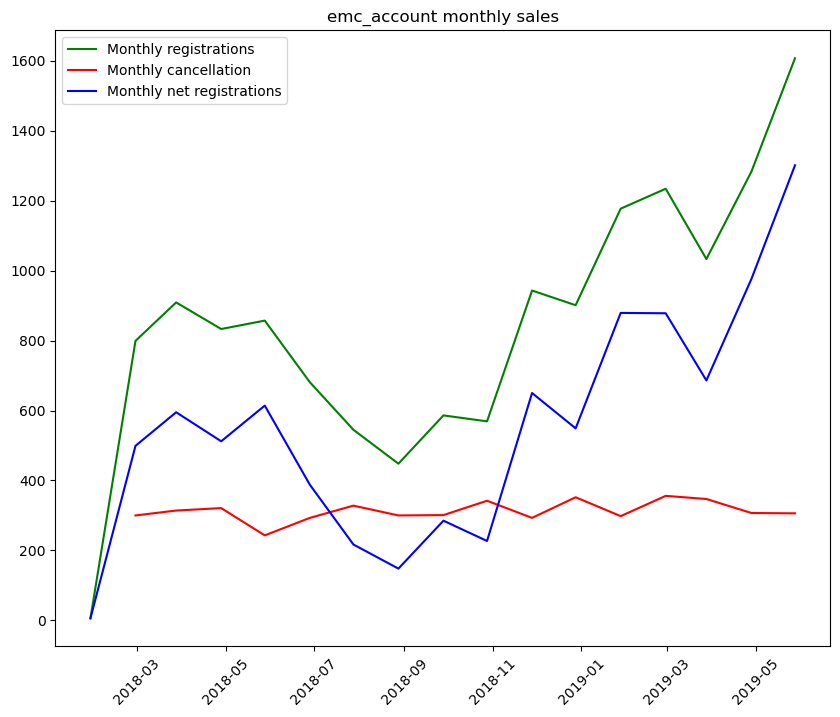

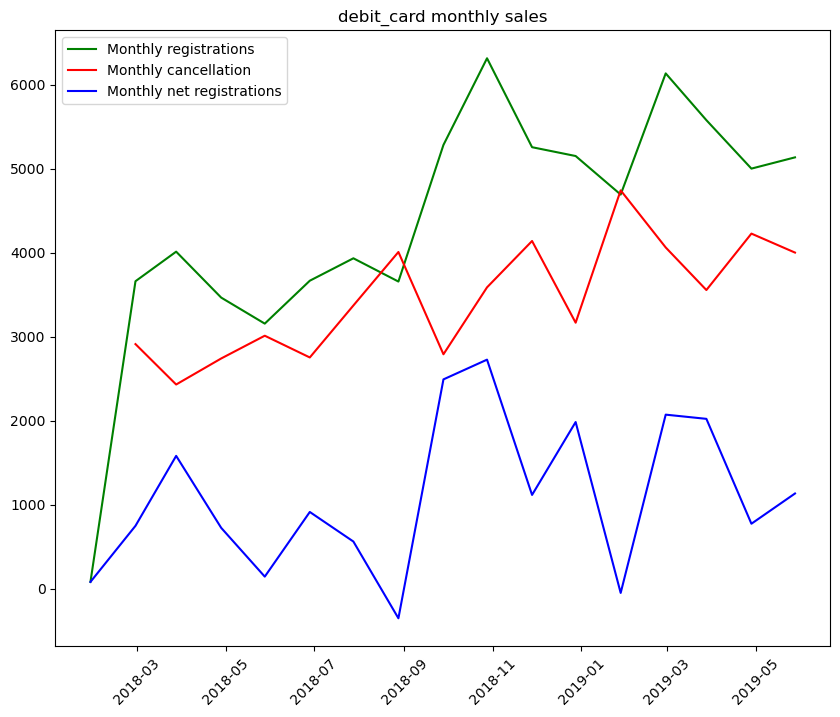

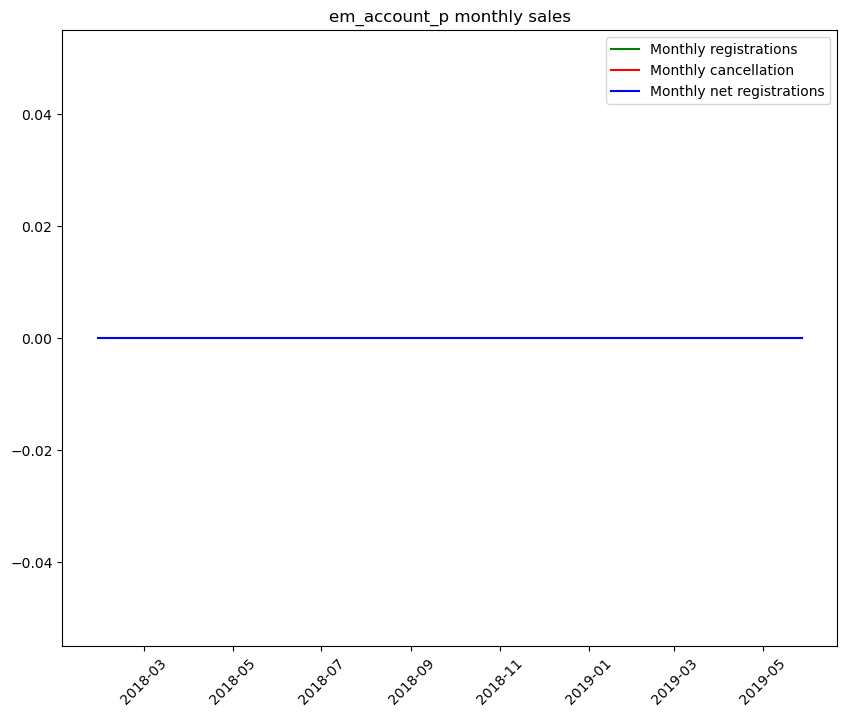

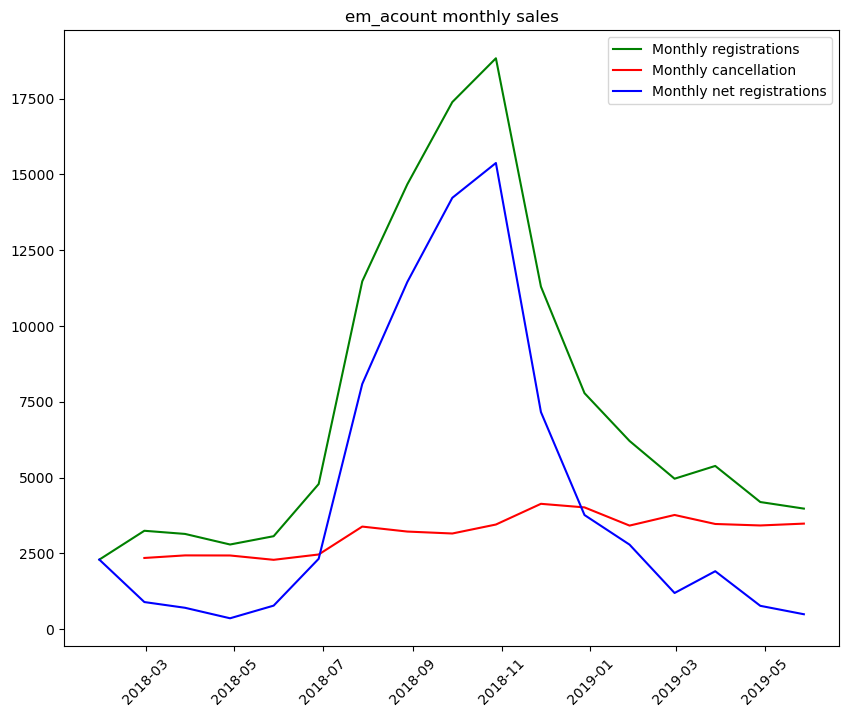

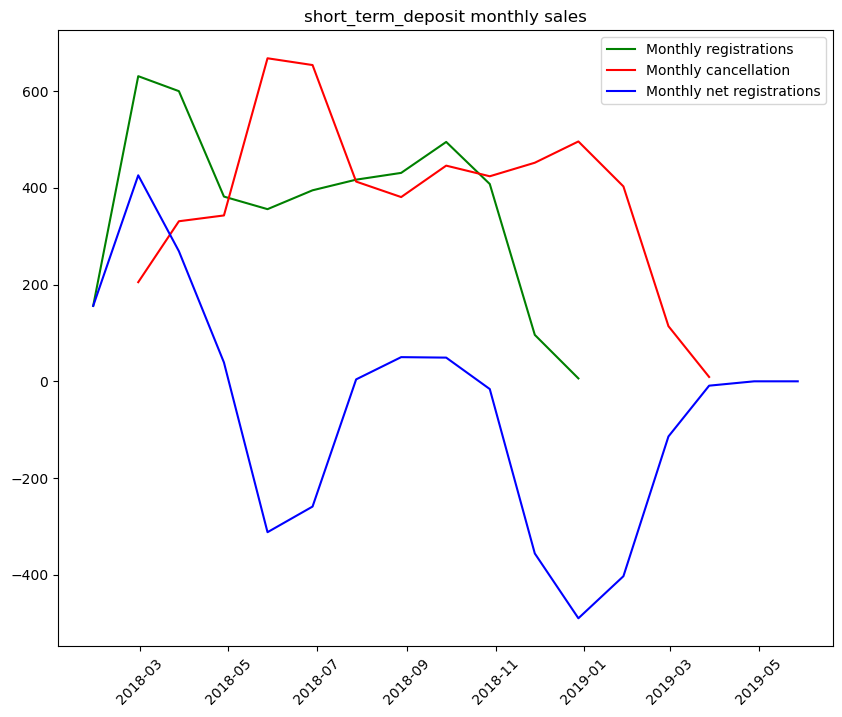

In [25]:
for i in productos:
    grafico_altas_bajas_mensuales(df,i)

### Grouping by product type

We want to perform an aggregated analysis of the offered products, so it's convenient to classify them into 3 categories: accounts, savings_investment, and financing.

In [26]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,suma_productos_totales,cliente_activo
0,15891,2018-07-28,2018-07-28,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,59,0,-999.0,Madrid,unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,1,0.0,1,1
1,15891,2018-08-28,2018-07-28,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,59,0,-999.0,Madrid,unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,1.000000,0,0,0.0,1,1
2,16063,2018-11-28,2018-11-19,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.290323,1,0,0.0,0,0
3,16063,2018-12-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.258065,0,0,0.0,0,0
4,16063,2019-01-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.258065,0,0,0.0,0,0


In [27]:
# Defino la clasificación de productos
clasificacion = {'cuenta': ['dif_payroll', 'dif_payroll_account', 'dif_emc_account', 'dif_debit_card', 'dif_em_account_p', 'dif_em_acount', 'dif_em_account_pp'],
                 'ahorro_inversion': ['dif_funds', 'dif_securities', 'dif_long_term_deposit'],
                 'financiacion': ['dif_short_term_deposit', 'dif_loans', 'dif_mortgage', 'dif_credit_card']}

In [28]:
#Creating columns for each category and set initial values to 0
for categoria in clasificacion.keys():
    df[categoria] = 0

# assigning 1 if the client has the product 
for categoria, productos in clasificacion.items():
    df[categoria] = df[productos].sum(axis=1)


In [29]:
df.sample(10)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ,dif_loans,dif_mortgage,dif_funds,dif_securities,dif_long_term_deposit,dif_em_account_pp,dif_credit_card,dif_payroll,dif_pension_plan,dif_payroll_account,dif_emc_account,dif_debit_card,dif_em_account_p,dif_em_acount,dif_short_term_deposit,meses_alta,new_client,productos_totales,ingresos_producto,suma_productos_totales,cliente_activo,cuenta,ahorro_inversion,financiacion
2867511,1222091,2018-03-28,2016-11-19,KHE,0,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,50.0,V,24,0,75432.63,Zaragoza,medium_low_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.935484,0,1,0.0,17,1,0,0,0
1954368,1155497,2018-06-28,2016-08-03,KAT,1,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,47.0,H,22,0,96000.84,Valladolid,medium_high_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22.387097,0,1,0.0,17,1,0,0,0
848287,1065568,2018-02-28,2015-09-24,KHE,0,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,47.0,H,23,0,137148.06,Valladolid,high_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28.645161,0,1,0.0,17,1,0,0,0
5109187,1414969,2019-05-28,2018-07-24,KHQ,1,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,46.0,H,24,0,98667.96,Valencia,medium_high_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.935484,0,1,0.0,11,1,0,0,0
3493296,1278978,2018-01-28,2017-07-28,KHE,0,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,30.0,V,21,0,-999.00,Murcia,unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.935484,0,1,0.0,17,1,0,0,0
5113320,1415390,2019-04-28,2018-07-25,KHQ,1,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,25.0,H,20,0,65744.85,Lerida,medium_low_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.935484,0,1,0.0,12,1,0,0,0
4589206,1361372,2018-12-28,2017-11-26,KHE,1,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,28.0,H,23,0,140875.71,Madrid,high_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.806452,0,1,0.0,17,1,0,0,0
989198,1075298,2019-05-28,2015-10-04,KHE,0,universitario,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,ES,6.0,V,24,0,23229.03,Badajoz,low_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42.967742,0,1,0.0,17,1,0,0,0
3225320,1255057,2018-10-28,2017-04-25,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,V,33,0,53691.66,Madrid,low_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.774194,0,0,0.0,0,0,0,0,0
140123,1008819,2018-12-28,2015-03-15,KFC,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,21.0,H,39,0,87663.60,Huelva,medium_low_salary,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44.645161,0,0,0.0,0,0,0,0,0


In [30]:
df_categorias=df.groupby('pk_partition')[['cuenta','ahorro_inversion','financiacion']].sum().reset_index()

In the last year (2019), we can observe that there have been quite a few cancellations of savings and investment products.

In [31]:
df_categorias.tail()

,pk_partition,cuenta,ahorro_inversion,financiacion
12,2019-01-28,2196,151,-447
13,2019-02-28,7411,76,-64
14,2019-03-28,6490,-95,25
15,2019-04-28,3757,-158,174
16,2019-05-28,5060,-237,54


We can see that accounts are the most popular products:

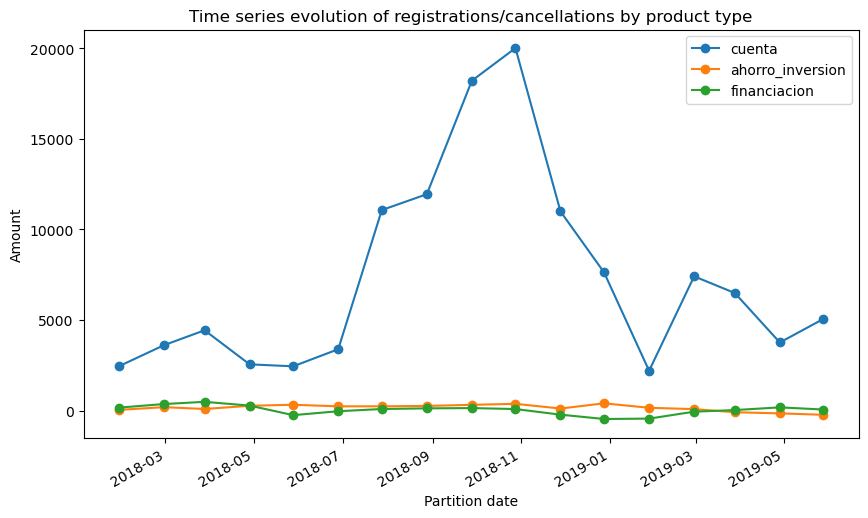

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

df_categorias.plot(x='pk_partition', y=['cuenta', 'ahorro_inversion', 'financiacion'],\
                    kind='line', ax=ax, marker='o')

plt.title('Time series evolution of registrations/cancellations by product type')
plt.xlabel('Partition date')
plt.ylabel('Amount')

plt.legend(loc='upper right')
plt.show()

If we analyze savings_investment and financing separately (we want to adjust the scale but we can't use logarithm because there are negative values), we observe a sharp decline in financing products in April-May 2018 and from November 2018 to February-March 2019 (where it starts to rebound). As for savings/investment products, we can observe a decreasing trend in the last period of the sample.

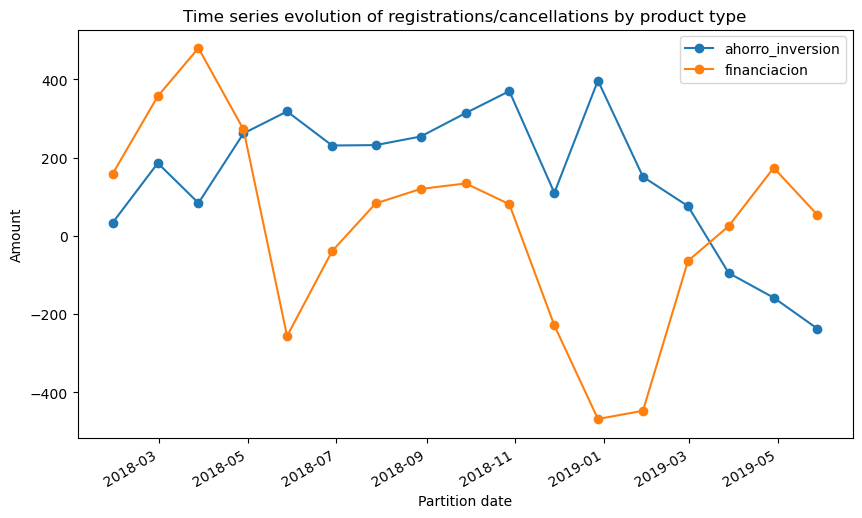

In [33]:

fig, ax = plt.subplots(figsize=(10, 6))

df_categorias.plot(x='pk_partition', y=['ahorro_inversion', 'financiacion'], kind='line', ax=ax, marker='o')

plt.title('Time series evolution of registrations/cancellations by product type')
plt.xlabel('Partition date')
plt.ylabel('Amount')

plt.legend(loc='upper right')
plt.show()

### Income evolution by product

In [34]:
ingresos={'debit_card':10 ,              
'em_account_p':10 ,               
'em_account_pp':10 ,              
'em_acount':10 ,                  
'emc_account':10 ,                
'payroll':10 ,                   
'payroll_account':10 ,            
'funds':40 ,                      
'long_term_deposit':40 ,         
'mortgage':40 ,                   
'pension_plan':40 ,               
'securities':40 ,                
'short_term_deposit':40 ,        
'loans':60 ,                      
'credit_card':60 }

In [35]:
productos_mes=df.groupby("pk_partition").agg(short_term_deposit = ("short_term_deposit", "sum"),
                                        loans = ("loans", "sum"),
                                        mortgage = ("mortgage", "sum"),
                                        funds = ("funds", "sum"),
                                        securities = ("securities", "sum"),
                                        long_term_deposit = ("long_term_deposit", "sum"),
                                        em_account_pp = ("em_account_pp", "sum"),
                                        credit_card = ("credit_card", "sum"),
                                        payroll = ("payroll", "sum"),
                                        pension_plan = ("pension_plan", "sum"),
                                        payroll_account = ("payroll_account", "sum"),
                                        emc_account = ("emc_account", "sum"),
                                        debit_card = ("debit_card", "sum"),
                                        em_account_p = ("em_account_p", "sum"),
                                        em_acount = ("em_acount", "sum"))

for x in ingresos:
    productos_mes[x] = productos_mes[x] * ingresos[x]

<Figure size 1600x800 with 0 Axes>

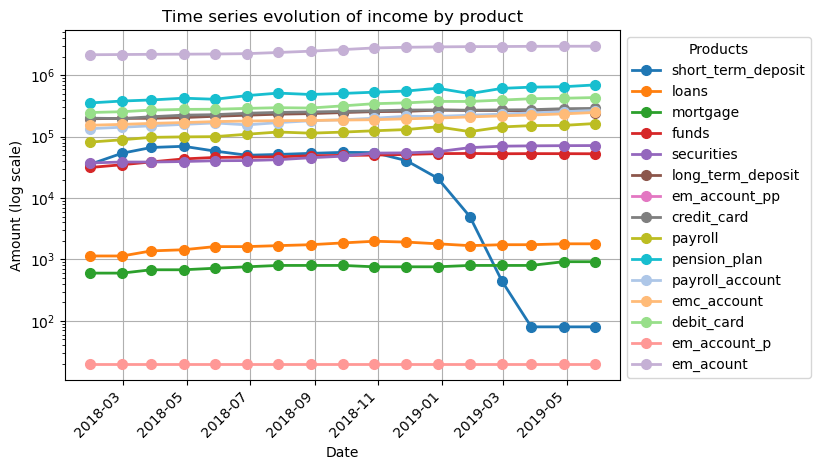

In [36]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']
plt.figure(figsize=(16, 8))

productos_mes.plot(kind='line', marker='o', markersize=7, linewidth=2, color= custom_colors)
plt.yscale('log')  # log scale for y axis
plt.title('Time series evolution of income by product')
plt.xlabel('Date')
plt.ylabel('Amount (log scale)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Products', bbox_to_anchor=(1, 1))
plt.show()

If we conduct a more detailed analysis, we can observe a significant decline in short-term deposits.

### Temporal analysis of products by major regions.

It is advisable to analyze the temporal evolution of the 3 types of products in the regions of Spain that generate the most income.

In [37]:
df_regiones_ppales=df.query("region_name == ['Madrid','Barcelona','Valencia', 'Murcia']")
# grouping by pk_partition and region_name and adding amounts
df_categorias_region = df.groupby(['pk_partition', 'region_name'])[['cuenta', 'ahorro_inversion', 'financiacion']].sum().reset_index()

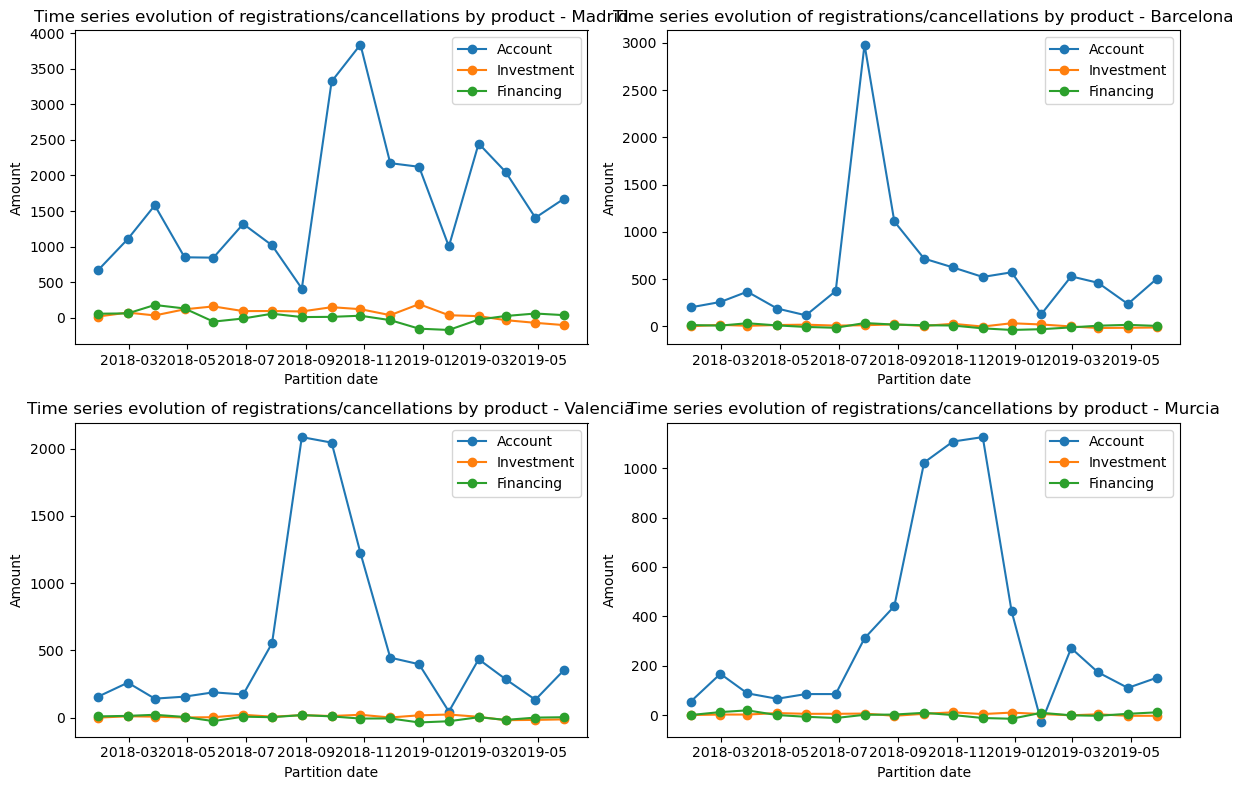

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()

# iterating over regions y plotting data 
for i, region in enumerate(df_regiones_ppales['region_name'].unique()):
    region_data = df_categorias_region[df_categorias_region['region_name'] == region]
    axs[i].plot(region_data['pk_partition'], region_data['cuenta'], marker='o', label='Account')
    axs[i].plot(region_data['pk_partition'], region_data['ahorro_inversion'], marker='o', label='Investment')
    axs[i].plot(region_data['pk_partition'], region_data['financiacion'], marker='o', label='Financing')
    
    axs[i].set_title(f'Time series evolution of registrations/cancellations by product - {region}')
    axs[i].set_xlabel('Partition date')
    axs[i].set_ylabel('Amount')
    axs[i].legend(loc='upper right')

# adjusting for overlapping
plt.tight_layout()
plt.show()


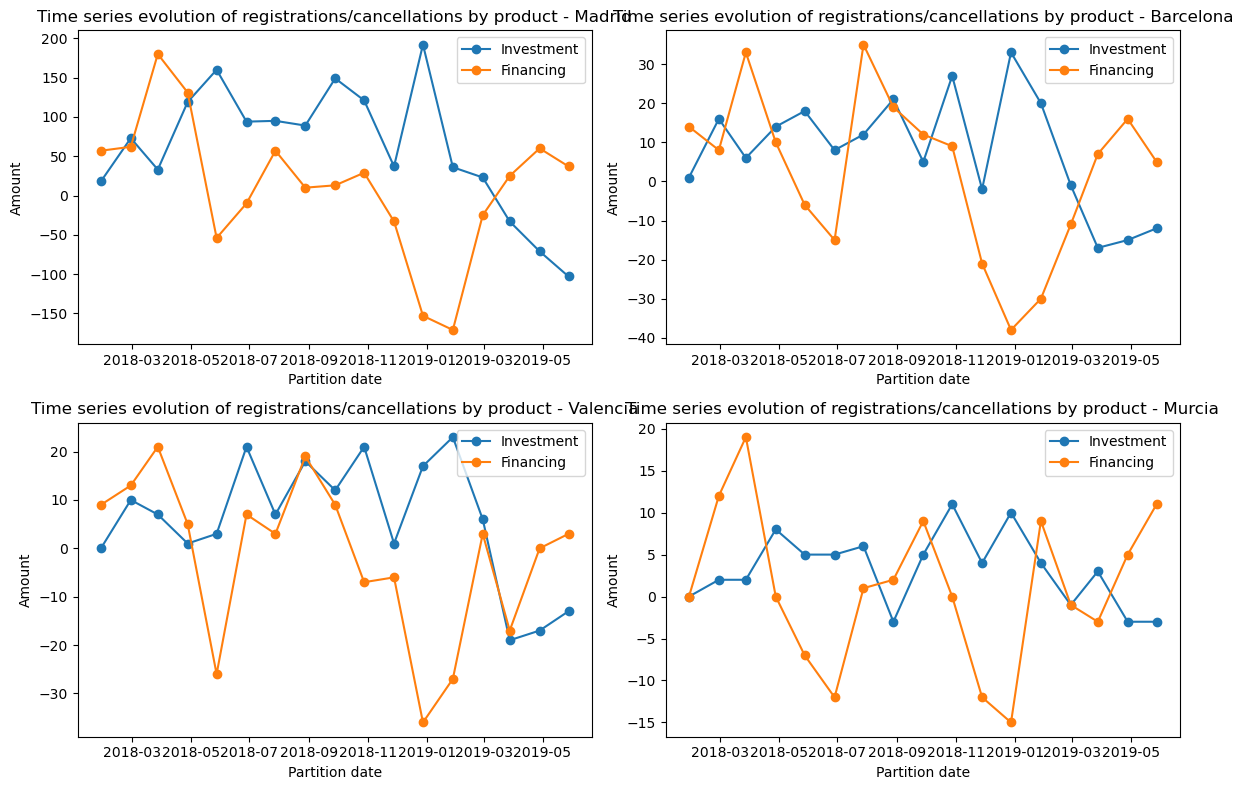

In [39]:
# since we have negative values we cant get a log scale in our data 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs = axs.flatten()

for i, region in enumerate(df_regiones_ppales['region_name'].unique()):
    region_data = df_categorias_region[df_categorias_region['region_name'] == region]
    axs[i].plot(region_data['pk_partition'], region_data['ahorro_inversion'], marker='o', label='Investment')
    axs[i].plot(region_data['pk_partition'], region_data['financiacion'], marker='o', label='Financing')

    axs[i].set_title(f'Time series evolution of registrations/cancellations by product - {region}')
    axs[i].set_xlabel('Partition date')
    axs[i].set_ylabel('Amount')
    axs[i].legend(loc='upper right') 

plt.tight_layout()
plt.show()

### Time series analysis by registrations and cancellations by salary category

In [40]:
df_categorias_salario = df.groupby(['pk_partition', 'salary_categ'])[['cuenta', 'ahorro_inversion', 'financiacion']].sum().reset_index()

In [41]:
df_categorias_salario.head()

,pk_partition,salary_categ,cuenta,ahorro_inversion,financiacion
0,2018-01-28,high_salary,489,12,38
1,2018-01-28,low_salary,468,3,18
2,2018-01-28,medium_high_salary,518,9,36
3,2018-01-28,medium_low_salary,529,7,34
4,2018-01-28,unknown,440,3,33


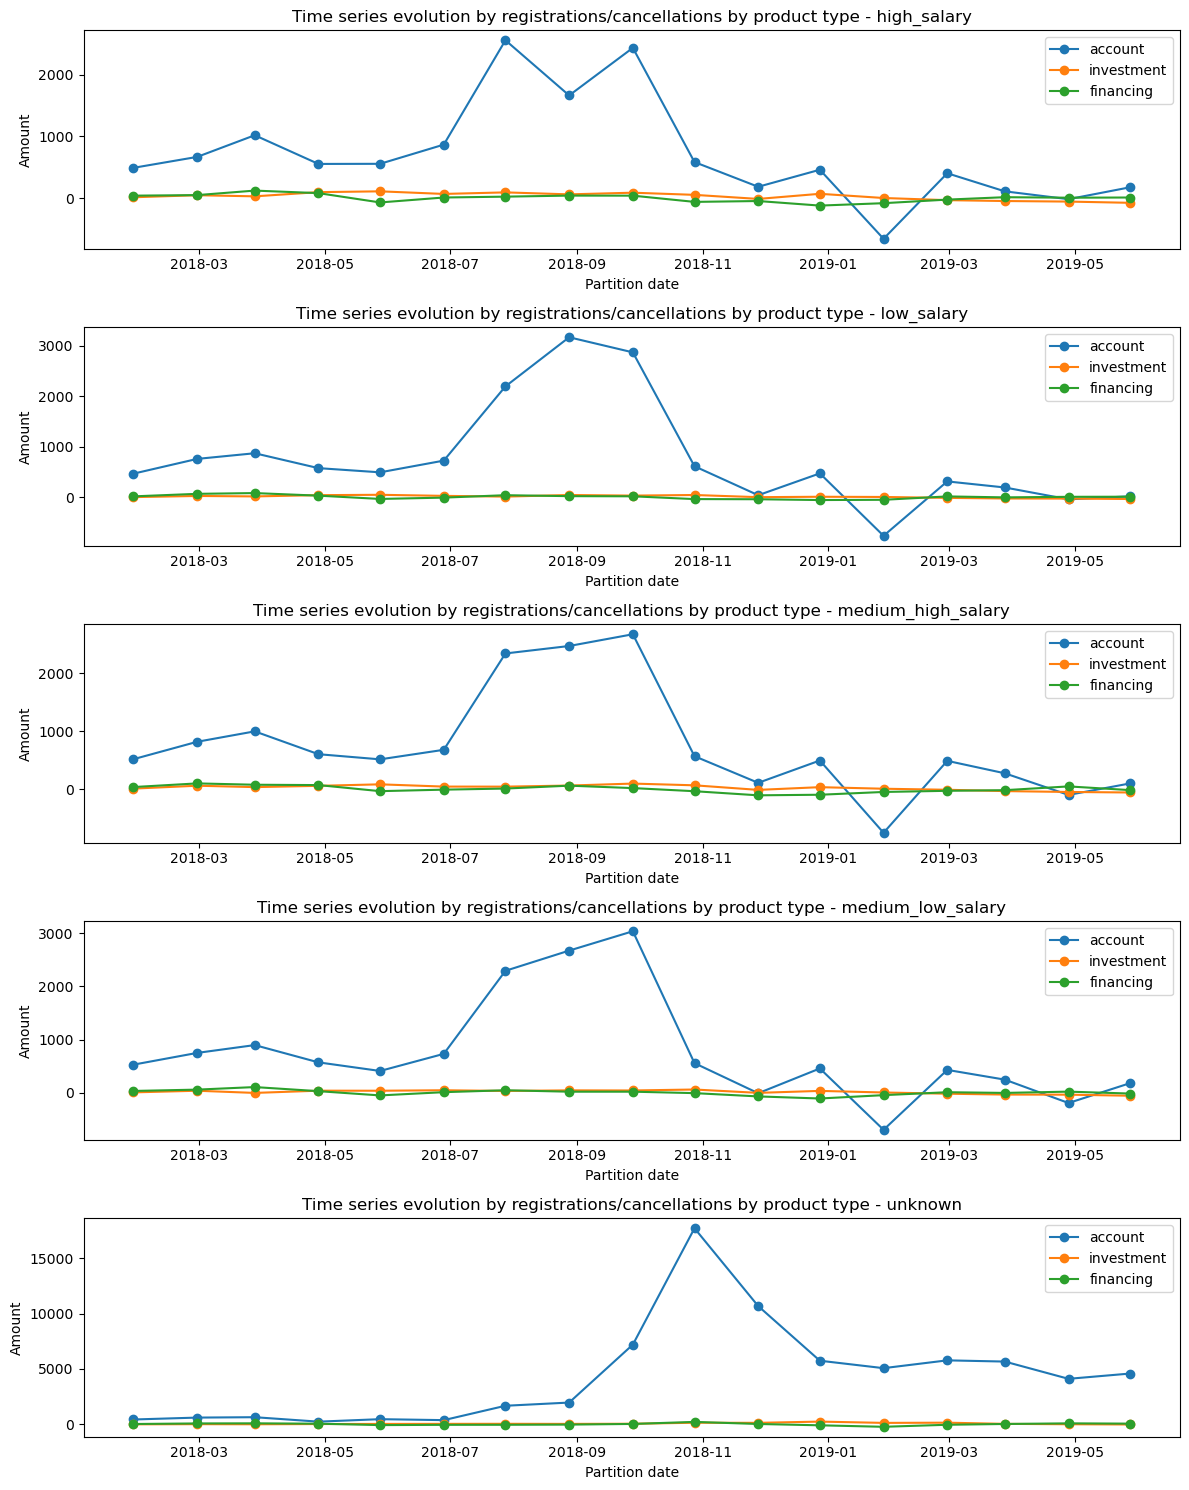

In [42]:
categorias_salario = df_categorias_salario['salary_categ'].unique()

num_subplots = len(categorias_salario)  # for subgplots = category number
fig, axs = plt.subplots(nrows=num_subplots, ncols=1, figsize=(12, 3 * num_subplots))
axs = axs.flatten()

for i, categ in enumerate(categorias_salario):
    salary_data = df_categorias_salario[df_categorias_salario['salary_categ'] == categ]
    axs[i].plot(salary_data['pk_partition'], salary_data['cuenta'], marker='o', label='account')
    axs[i].plot(salary_data['pk_partition'], salary_data['ahorro_inversion'], marker='o', label='investment')
    axs[i].plot(salary_data['pk_partition'], salary_data['financiacion'], marker='o', label='financing')
    
    axs[i].set_title(f'Time series evolution by registrations/cancellations by product type - {categ}')
    axs[i].set_xlabel('Partition date')
    axs[i].set_ylabel('Amount')
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [43]:
df.to_pickle('EasyMoney_1.pkl', compression='zip')